Use new features you generated, either delete or impute existing features with missing values. 
Build the best linear regression model you could. You can use glmnet or other library you choose.

In [1]:
loan <- read.csv("loan.csv", stringsAsFactors = FALSE)
loanT <- loan

leave out features with missing values over 80% 

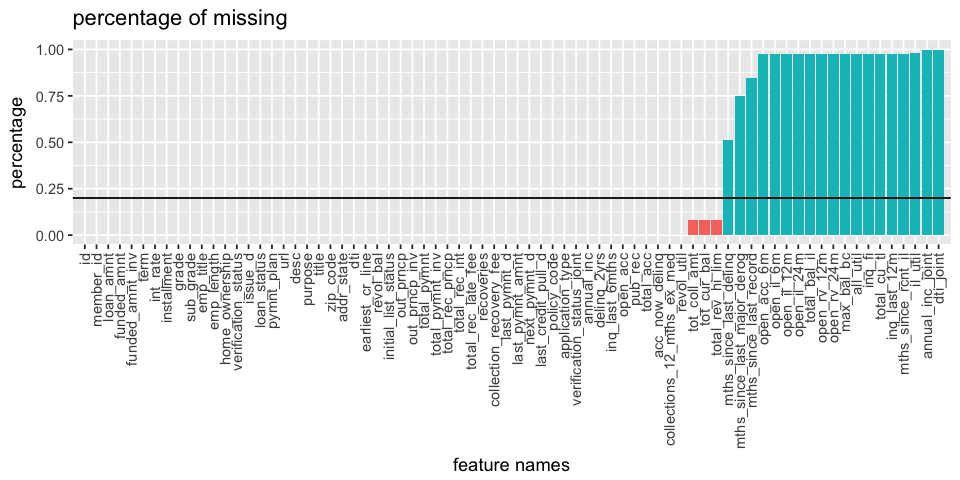

In [33]:
library(ggplot2)
num.NA <- sort(colSums(sapply(loan, is.na)))
dfnum.NA <- data.frame(ind = c(1:length(num.NA)),
                       percentage = num.NA/nrow(loan),
                       per80 = num.NA/nrow(loan)>=0.2,
                           name = names(num.NA),
                       row.names = NULL) # convert to data.frame
options(repr.plot.width=8, repr.plot.height=4)
ggplot(data = dfnum.NA, aes(x=ind, y=percentage)) + 
  geom_bar(aes(fill=per80), stat="identity") + 
  scale_x_discrete(name ="feature names", 
                   limits=dfnum.NA$name)+
  theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none") +
  geom_hline(yintercept = 0.2) + 
  ggtitle("percentage of missing")

In [34]:
dfnum.NA$name[dfnum.NA$per80]

[1] mths_since_last_delinq      mths_since_last_major_derog
 [3] mths_since_last_record      open_acc_6m                
 [5] open_il_6m                  open_il_12m                
 [7] open_il_24m                 total_bal_il               
 [9] open_rv_12m                 open_rv_24m                
[11] max_bal_bc                  all_util                   
[13] inq_fi                      total_cu_tl                
[15] inq_last_12m                mths_since_rcnt_il         
[17] il_util                     annual_inc_joint           
[19] dti_joint                  
74 Levels: acc_now_delinq addr_state all_util annual_inc ... zip_code

In [35]:
loan[, as.character(dfnum.NA$name[dfnum.NA$per80])] <- NULL

feature variance

In [36]:
#compare unique and not NA
data.frame(apply(loan, 2, function(x){length(unique(x))}),apply(loan, 2, function(x){sum(!is.na(x))}))

,apply.loan..2..function.x...,apply.loan..2..function.x....1
id,887379,887379
member_id,887379,887379
loan_amnt,1372,887379
funded_amnt,1372,887379
funded_amnt_inv,9729,887379
term,2,887379
int_rate,542,887379
installment,68711,887379
grade,7,887379
sub_grade,35,887379


In [37]:
# remove all unique and the feature need NLP (desc)
loan[, c("id", "member_id", "url", "desc")] <- NULL

In [38]:
# drop loan payment features, which happend after interest rate initiation (except for loan_amnt)
loan[, c("installment", "funded_amnt", "funded_amnt_inv",
         "last_pymnt_amnt", "last_pymnt_d", "next_pymnt_d",
         "pymnt_plan", "recoveries", "total_pymnt", 
         "total_pymnt_inv", "total_rec_int", "total_rec_late_fee",
         "total_rec_prncp", "collection_recovery_fee", "out_prncp", "out_prncp_inv")] <- NULL

In [39]:
# drop potential response variables, not features
loan[, c("grade", "sub_grade", "loan_status")] <- NULL

In [40]:
#drop too many variables and only one variables (policy_code)
loan[, c("zip_code", "addr_state", "policy_code")] <- NULL

In [41]:
table(loan$verification_status)


   Not Verified Source Verified        Verified 
         266750          329558          291071 

In [42]:
aov.res = aov(int_rate ~ factor(verification_status), na.action = na.omit, data = loan, )
summary(aov.res)

                                Df   Sum Sq Mean Sq F value Pr(>F)    
factor(verification_status)      2  1080177  540089   30032 <2e-16 ***
Residuals                   887376 15958157      18                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [43]:
table(loan$verification_status_joint)


                   Not Verified Source Verified        Verified 
         886868             283              61             167 

In [44]:
aov.res = aov(int_rate ~ factor(verification_status_joint), na.action = na.omit, data = loan, )
summary(aov.res)

                                      Df   Sum Sq Mean Sq F value Pr(>F)    
factor(verification_status_joint)      3     2825   941.7   49.05 <2e-16 ***
Residuals                         887375 17035509    19.2                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [45]:
#drop two features have no clear pattern with int_rate
loan[, c("verification_status", "verification_status_joint")] <- NULL

start to build model

In [46]:
#show all the selected features
colnames(loan)

[1] "loan_amnt"                  "term"                      
 [3] "int_rate"                   "emp_title"                 
 [5] "emp_length"                 "home_ownership"            
 [7] "annual_inc"                 "issue_d"                   
 [9] "purpose"                    "title"                     
[11] "dti"                        "delinq_2yrs"               
[13] "earliest_cr_line"           "inq_last_6mths"            
[15] "open_acc"                   "pub_rec"                   
[17] "revol_bal"                  "revol_util"                
[19] "total_acc"                  "initial_list_status"       
[21] "last_credit_pull_d"         "collections_12_mths_ex_med"
[23] "application_type"           "acc_now_delinq"            
[25] "tot_coll_amt"               "tot_cur_bal"               
[27] "total_rev_hi_lim"

In [47]:
#feature engineering on earliest_cr_line: merge the data with old years (before 1976)
library(zoo)
loan$earliest_cr_line_1 <- as.Date(as.yearmon(loan$earliest_cr_line, "%b-%Y"))
loan$earliest_cr_line_year <- format(loan$earliest_cr_line_1, '%Y')
loan$gen_earliest_cr_line_year <- loan$earliest_cr_line_year
loan[which(loan$earliest_cr_line_year %in% c(1:1976)), "gen_earliest_cr_line_year"] = "1976"

loan$gen_earliest_cr_line_year[which(is.na(loan$gen_earliest_cr_line_year))] = 
round(mean(as.numeric(loan$gen_earliest_cr_line_year), na.rm=T))  #replace NA with mean



Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Warning message in strptime(x, format, tz = "GMT"):
“unknown timezone 'default/America/Chicago'”

In [48]:
unique(loan$gen_earliest_cr_line_year) ##check all the unique variables in earliest_cr_line

[1] "1985" "1999" "2001" "1996" "2004" "2005" "2007" "1998" "1989" "2003"
[11] "1991" "1993" "1997" "1983" "2002" "1984" "2006" "1987" "1981" "2000"
[21] "1994" "1995" "1992" "1986" "1990" "1988" "1980" "2008" "1976" "1979"
[31] "1982" "1978" "1977" "2010" "2009" "2011" "2012"

In [49]:
#feature engineering on issue_d: merge the data with old years (before 1976)
library(zoo)
loan$gen_issue_d <- as.Date(as.yearmon(loan$issue_d, "%b-%Y"))
loan$gen_issue_year <- as.character(format(loan$gen_issue_d, "%Y"))
loan$gen_issue_mon <- as.character(format(loan$gen_issue_d, "%m"))

In [50]:
table(loan$home_ownership)


     ANY MORTGAGE     NONE    OTHER      OWN     RENT 
       3   443557       50      182    87470   356117 

In [51]:
# feature engineering on home_ownership: binning "ANY", "NONE", "OTHER"
loan$gen_home_ownership = loan$home_ownership
loan$gen_home_ownership[loan$home_ownership %in% c("ANY", "NONE", "OTHER")] = "others"

In [52]:
#replace loan annual_inc NA and 0 (doesn't make sense) value with mean value
loan$annual_inc[which(is.na(loan$annual_inc) | (loan$annual_inc == 0))] = mean(loan$annual_inc, na.rm=T)

In [53]:
# feature engineering on emp_length : split emp_length to < 5 ; >= 5
loan$gen_emp_length_sim = NA
loan[which(loan$emp_length %in% c('10+ years', '8 years','9 years','5 years','6 years','7 years')), "gen_emp_length_sim"] = ">= 5"
loan[which(loan$emp_length %in% c('< 1 year', '1 year','2 years','3 years','4 years')), "gen_emp_length_sim"] = "< 5"

In [54]:
# feature engineering on last_credit_pull_d
library("zoo")
loan$last_credit_pull_date = as.Date(as.yearmon(loan$last_credit_pull_d, "%b-%Y"))

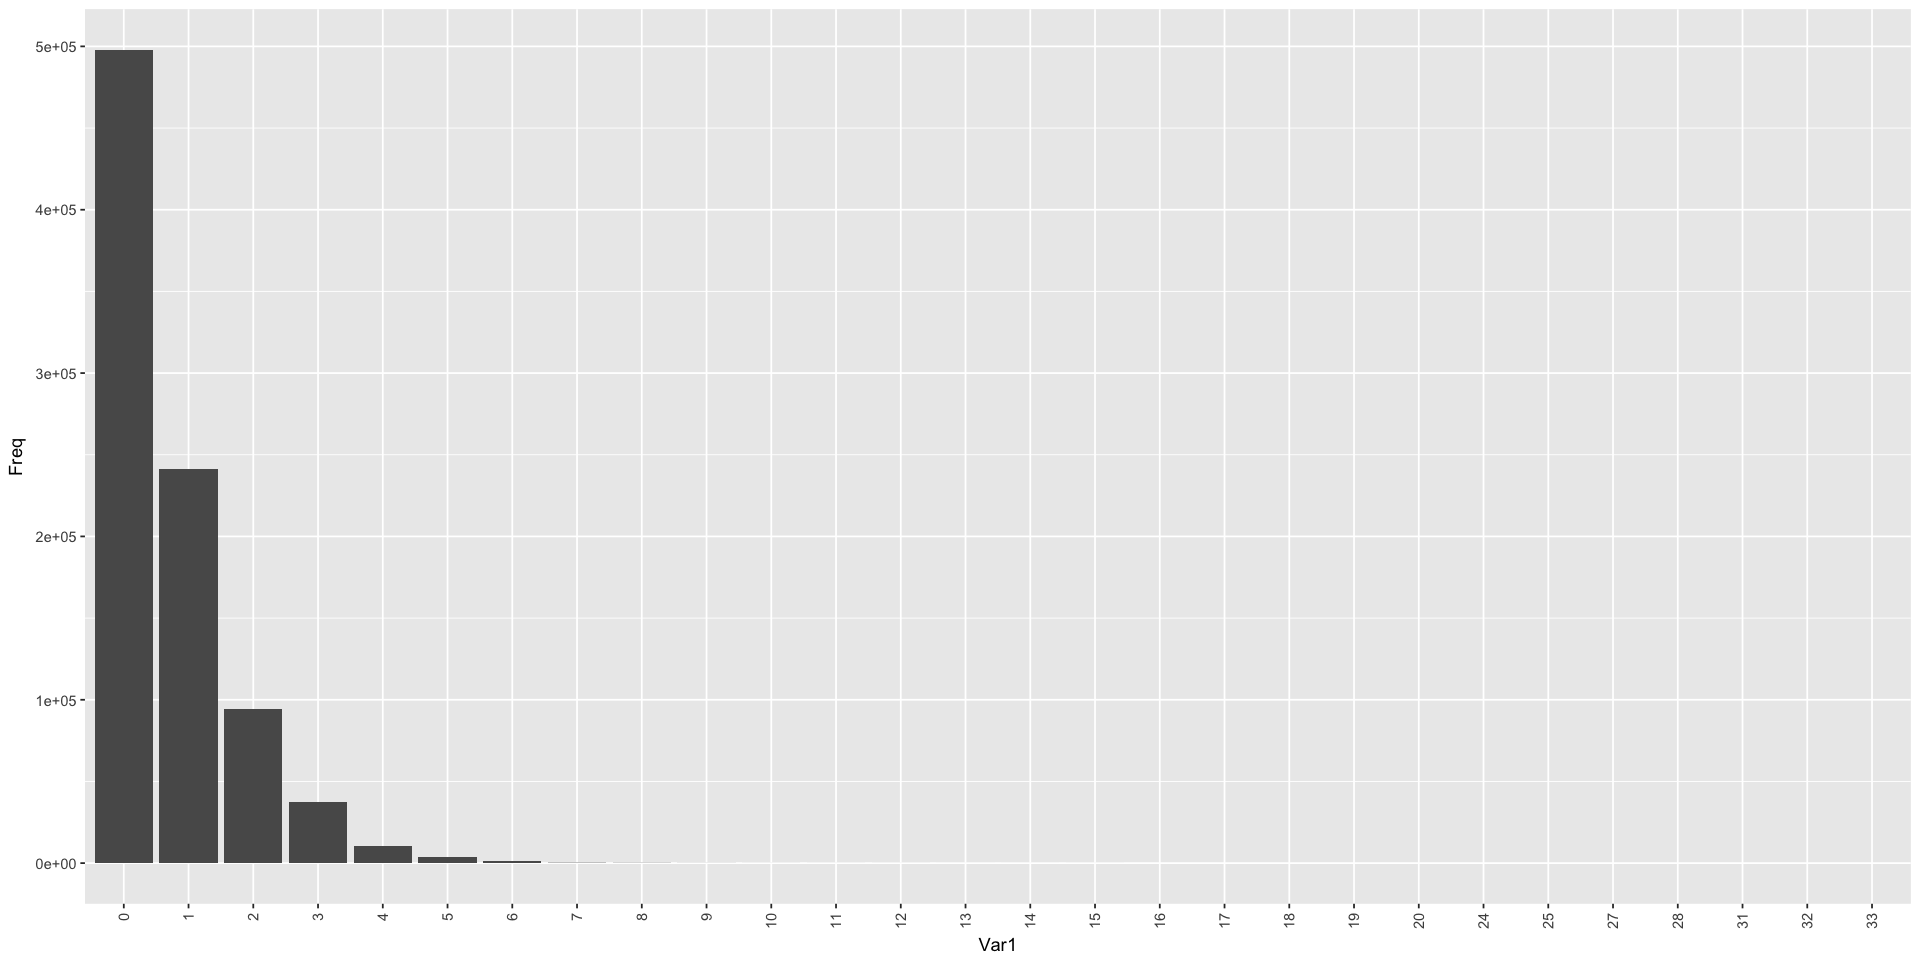

In [55]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(as.data.frame(table(loan$inq_last_6mths)), aes(x=Var1, y=Freq)) + 
geom_bar(stat="identity") + 
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5),
        legend.position = "none")

In [56]:
# feature engineering on inq_last_6mths: binning: > 4 is 5
loan$gen_inq_last_6mths = loan$inq_last_6mths
loan$gen_inq_last_6mths[loan$inq_last_6mths > 4] = 5

In [57]:
# split data into train and test for model performance
set.seed(11)
train.ind <- sample(1:dim(loan)[1], 0.7 * dim(loan)[1])
train <- loan[train.ind, ]
test <- loan[-train.ind, ]

In [58]:
# build linear model
# split data into train and test for model performance
mod <- lm(int_rate ~ loan_amnt + term + annual_inc + purpose + dti + delinq_2yrs + 
        open_acc + pub_rec + revol_bal + revol_util + total_acc + 
          initial_list_status + last_credit_pull_date +collections_12_mths_ex_med + application_type 
          + acc_now_delinq + tot_coll_amt + tot_cur_bal + total_rev_hi_lim + 
          gen_earliest_cr_line_year+
          gen_issue_d + gen_issue_year + gen_issue_mon+
          gen_home_ownership+ gen_emp_length_sim + gen_inq_last_6mths
          ,data = train)
summary(mod)


Call:
lm(formula = int_rate ~ loan_amnt + term + annual_inc + purpose + 
    dti + delinq_2yrs + open_acc + pub_rec + revol_bal + revol_util + 
    total_acc + initial_list_status + last_credit_pull_date + 
    collections_12_mths_ex_med + application_type + acc_now_delinq + 
    tot_coll_amt + tot_cur_bal + total_rev_hi_lim + gen_earliest_cr_line_year + 
    gen_issue_d + gen_issue_year + gen_issue_mon + gen_home_ownership + 
    gen_emp_length_sim + gen_inq_last_6mths, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.109  -2.215  -0.276   1.950 155.457 

Coefficients: (1 not defined because of singularities)
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    5.080e+01  1.184e+00  42.904  < 2e-16 ***
loan_amnt                      4.481e-05  6.368e-07  70.370  < 2e-16 ***
term 60 months                 4.089e+00  1.040e-02 393.356  < 2e-16 ***
annual_inc                    -3.078e-06  7.914e-08 -38.890  < 2e-1

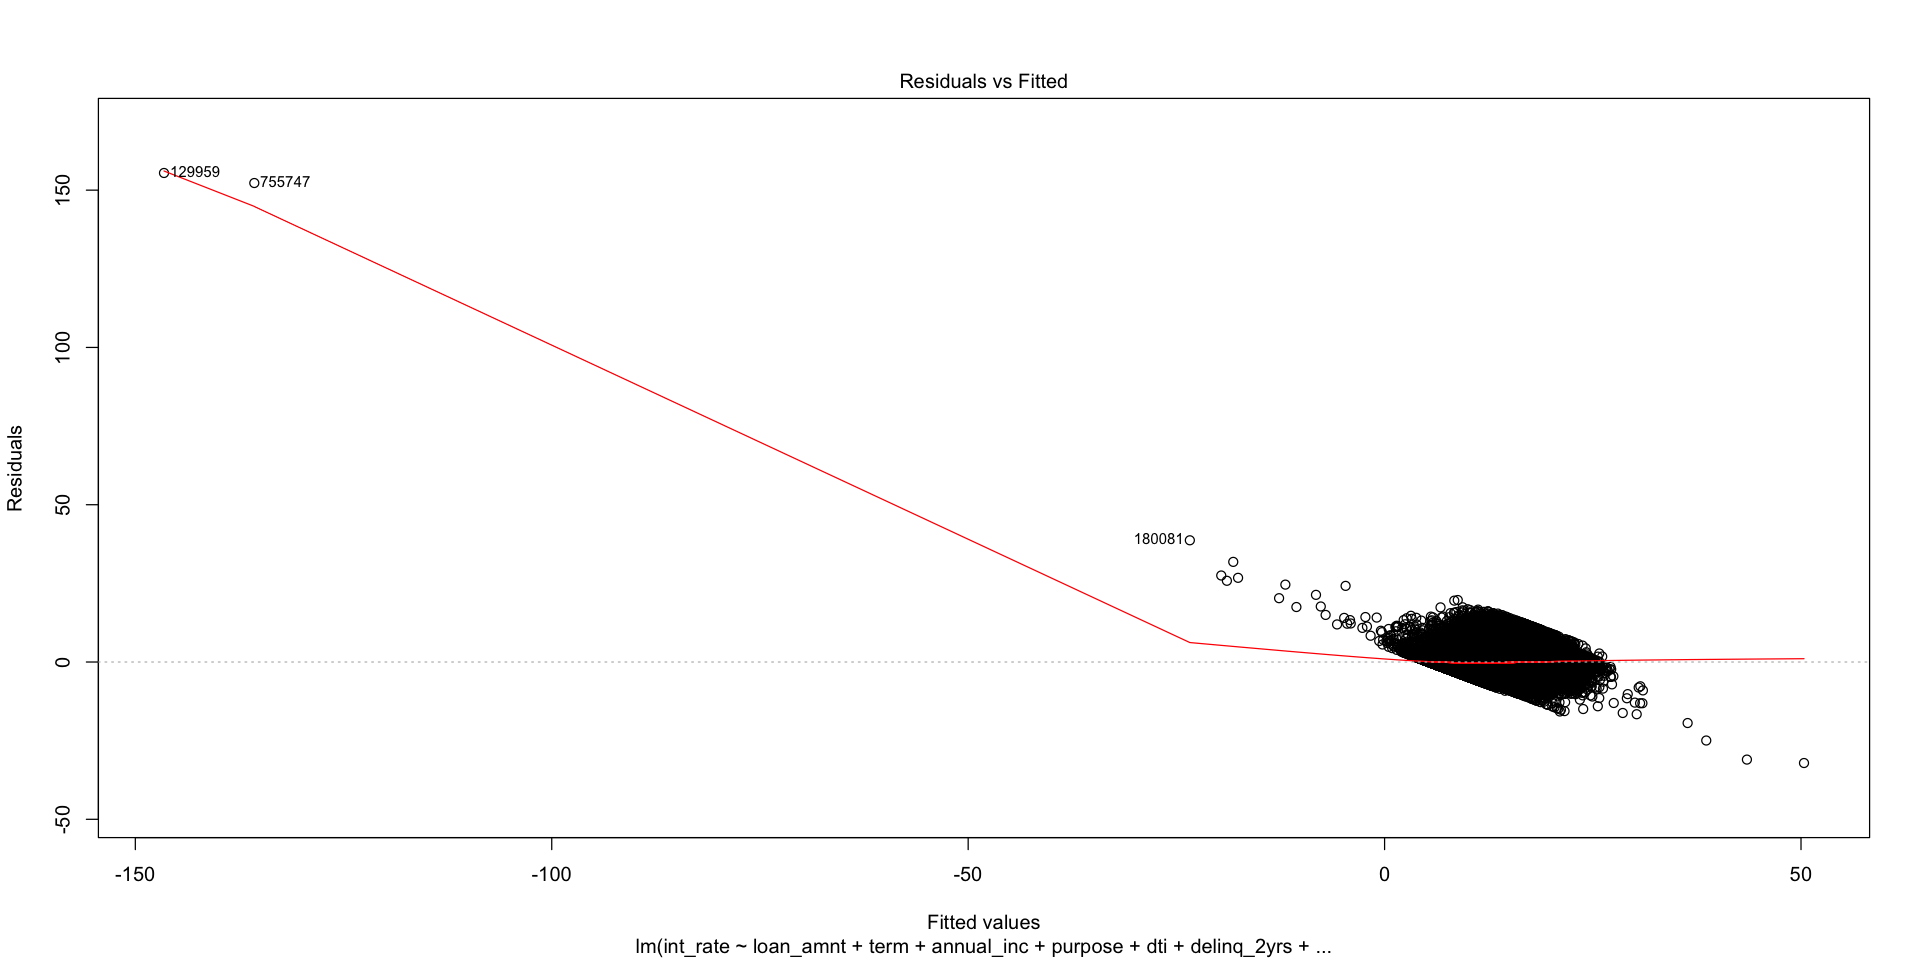

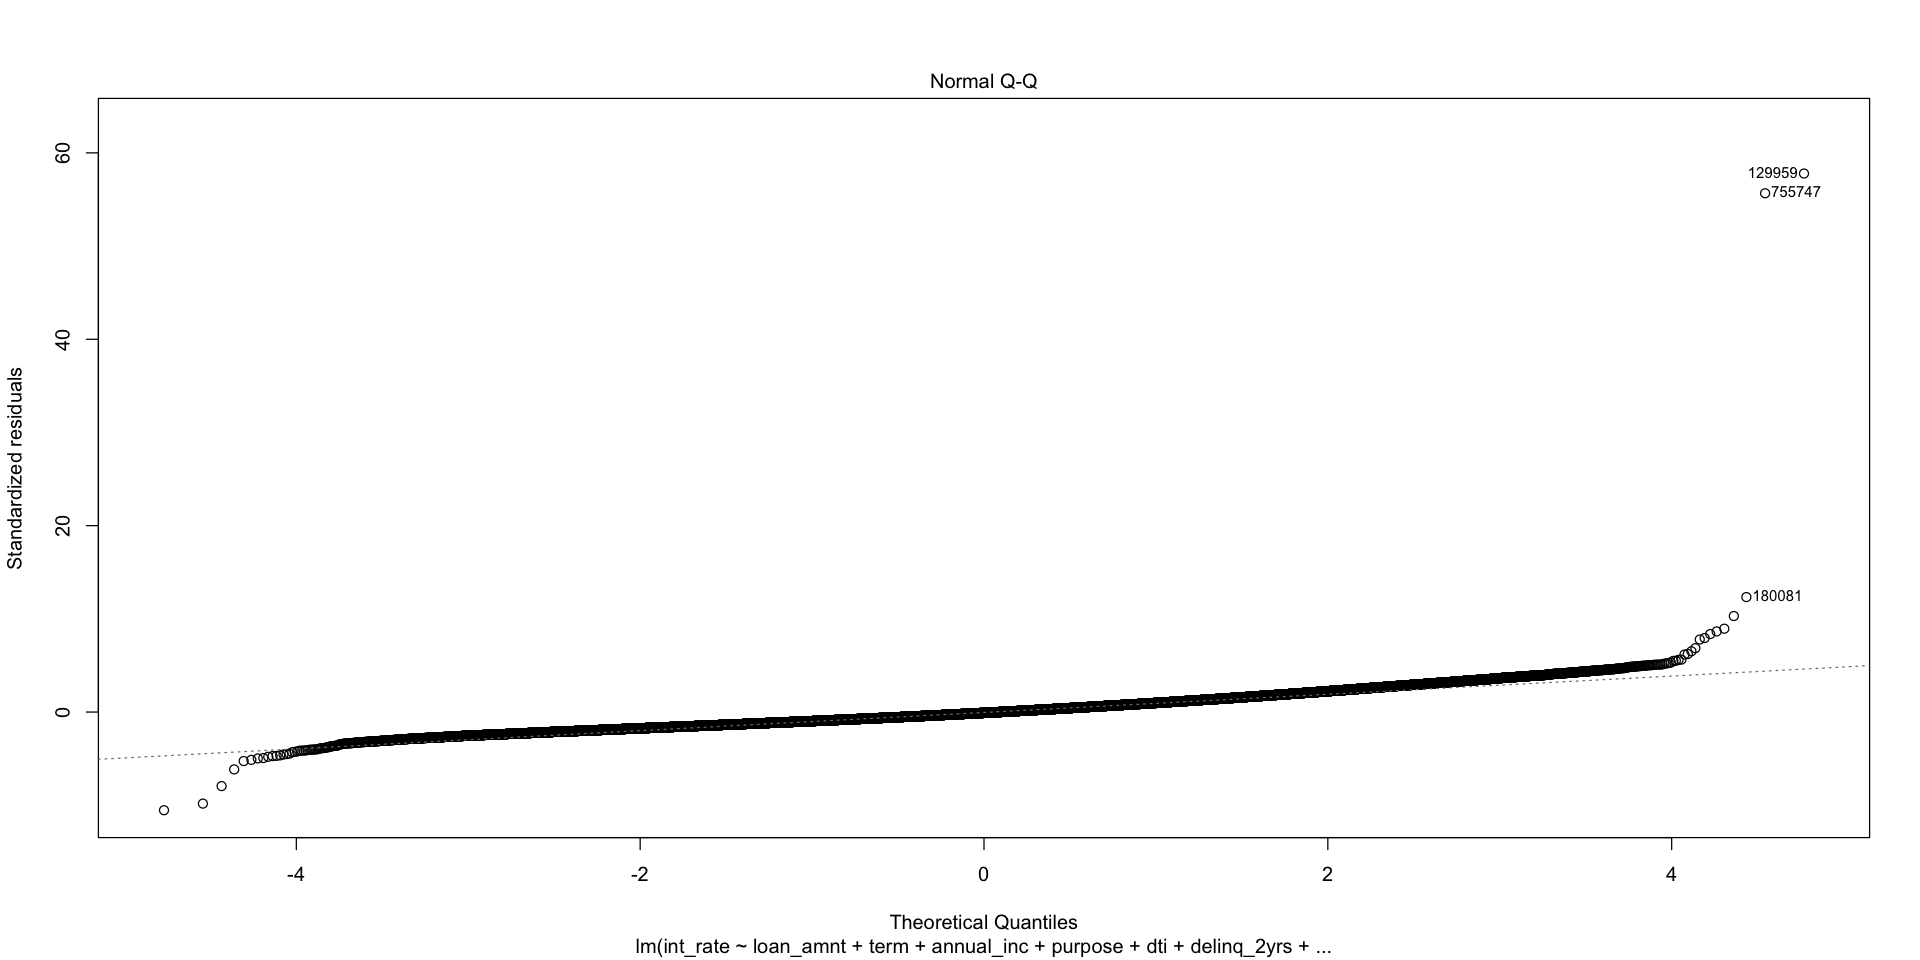

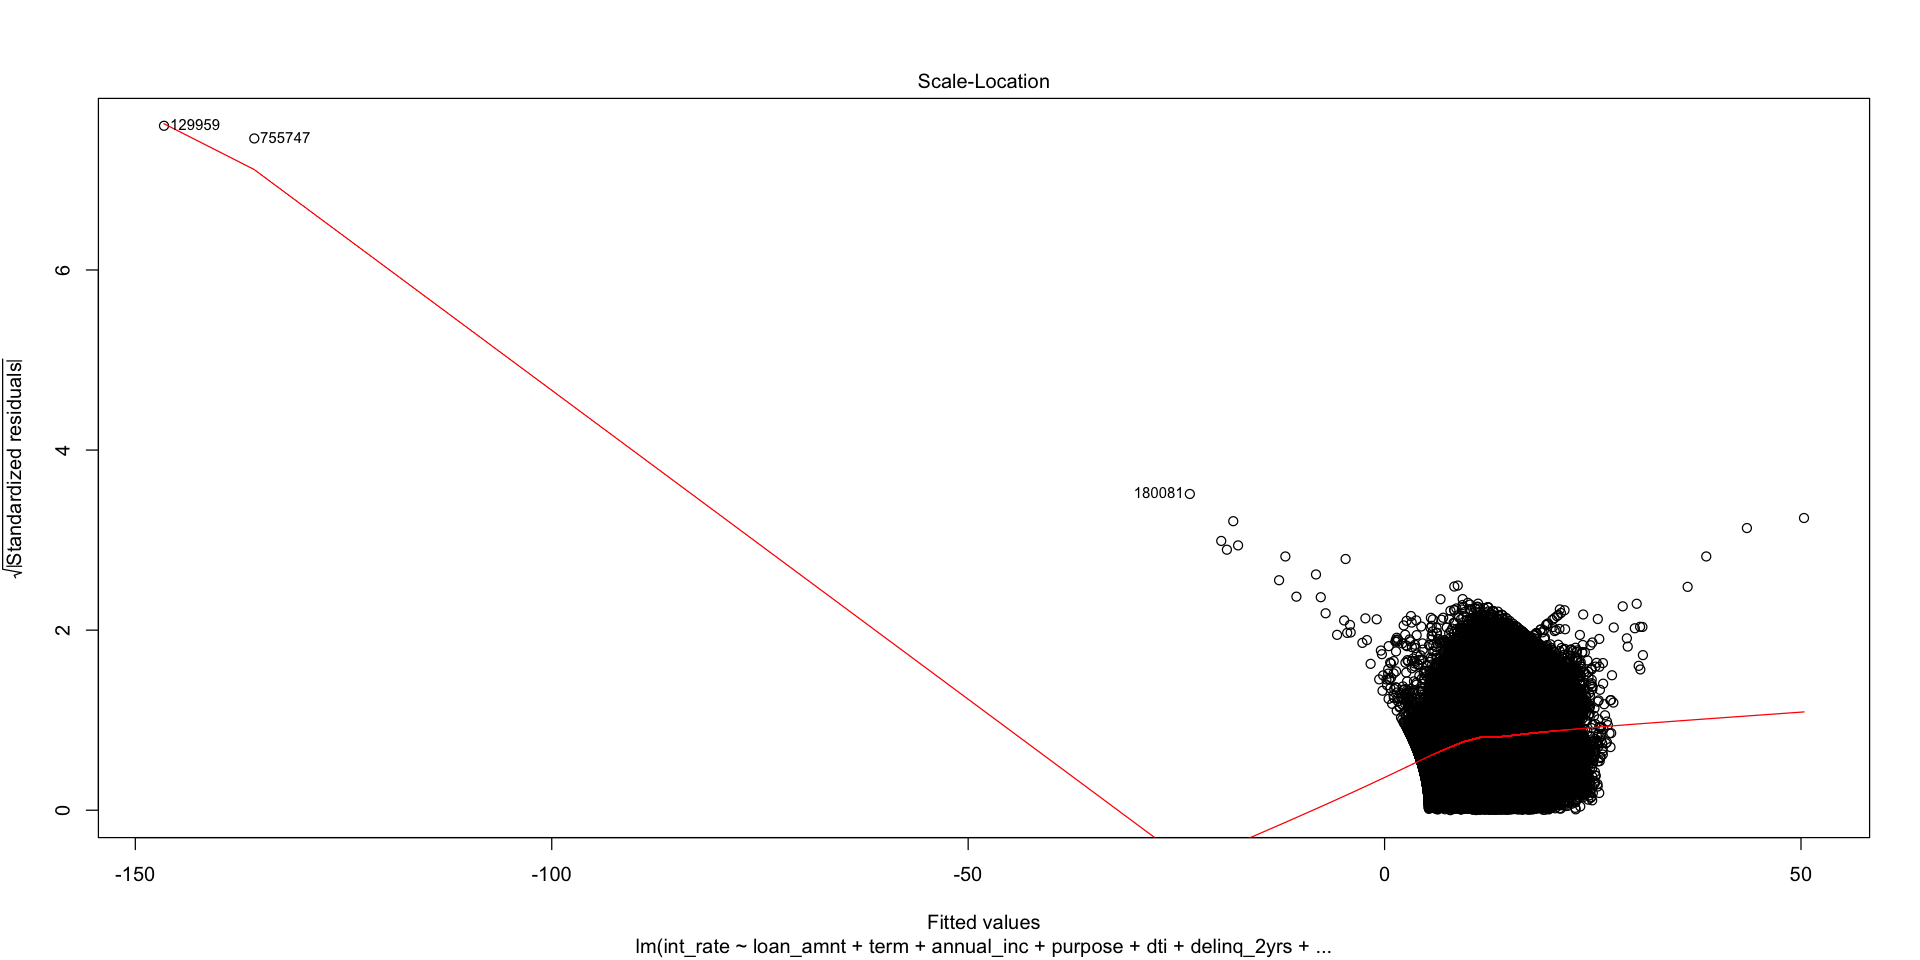

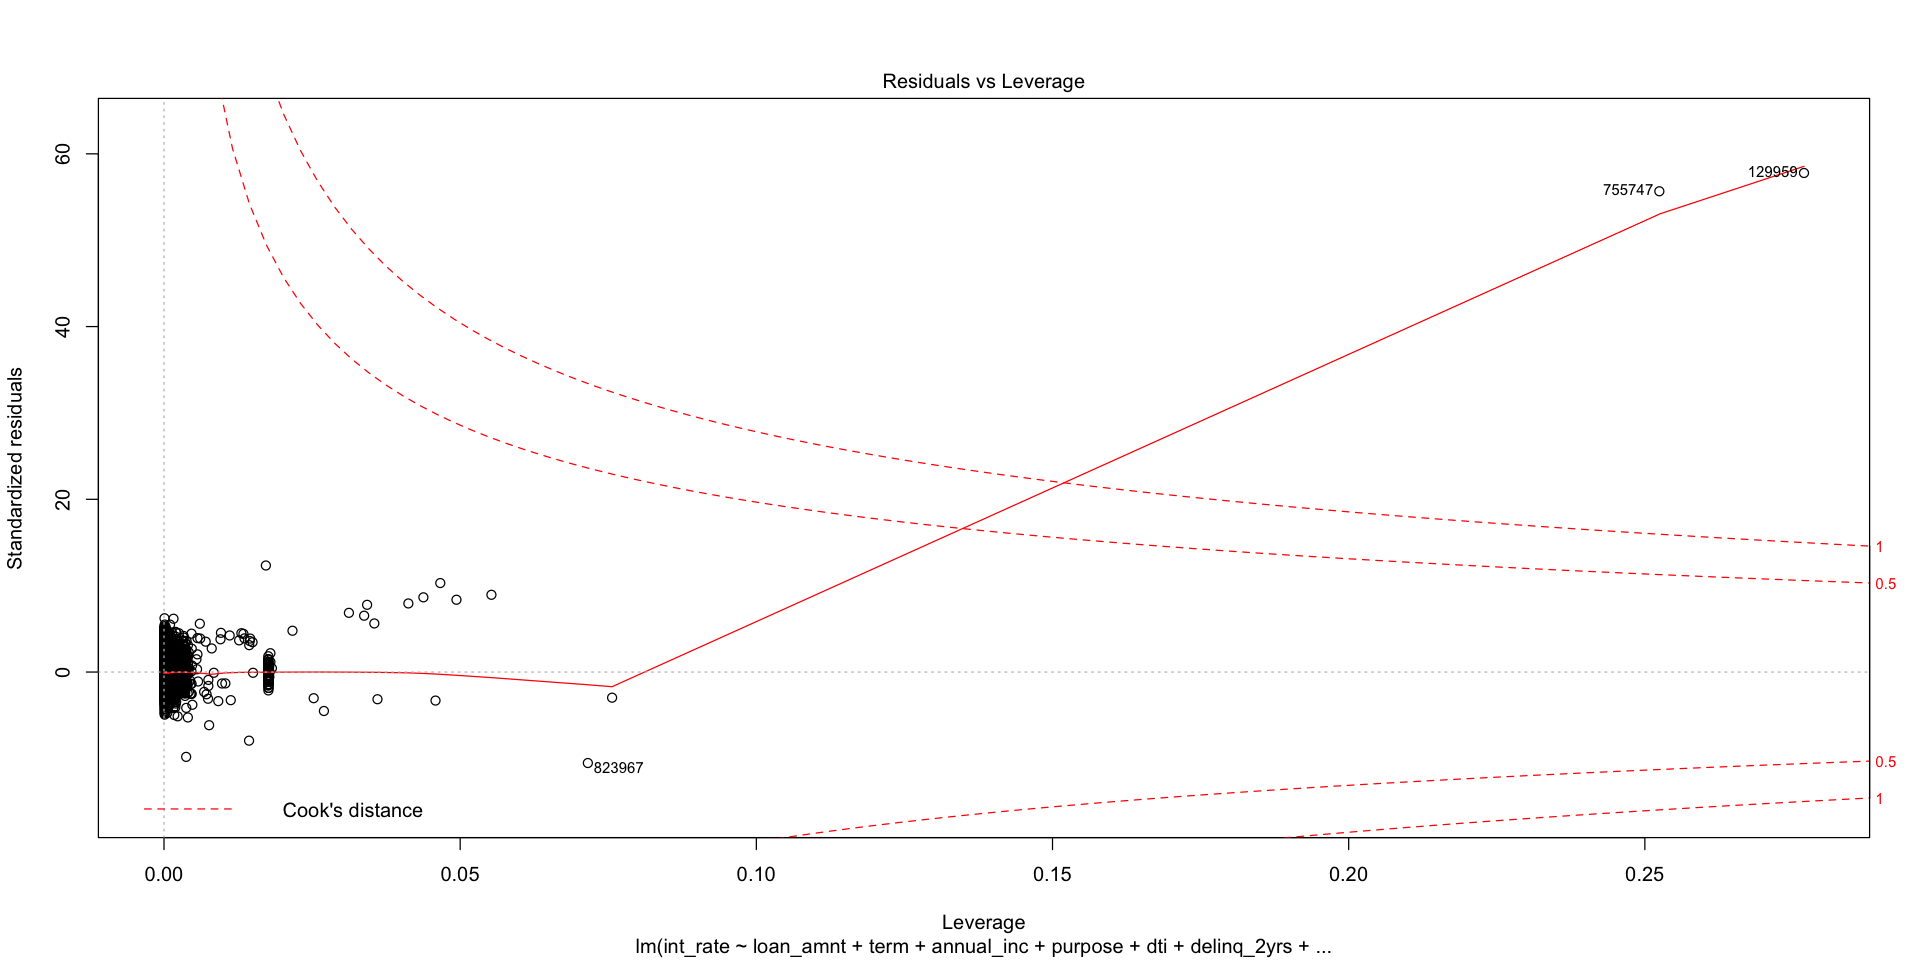

In [59]:
plot(mod)

In [60]:
train.sub = train[-which(rownames(train) %in% c(129959, 755747, 180081)), ]

In [61]:
# remove extreme outliers
mod2 <- lm(int_rate ~ loan_amnt + term + annual_inc + purpose + dti + delinq_2yrs + 
        open_acc + pub_rec + revol_bal + revol_util + total_acc + 
          initial_list_status + last_credit_pull_date +collections_12_mths_ex_med + application_type 
          + acc_now_delinq + tot_coll_amt + tot_cur_bal + total_rev_hi_lim + 
          gen_earliest_cr_line_year+
          gen_issue_d + gen_issue_year + gen_issue_mon+
          gen_home_ownership+ gen_emp_length_sim + gen_inq_last_6mths
          ,data = train.sub)
summary(mod2)


Call:
lm(formula = int_rate ~ loan_amnt + term + annual_inc + purpose + 
    dti + delinq_2yrs + open_acc + pub_rec + revol_bal + revol_util + 
    total_acc + initial_list_status + last_credit_pull_date + 
    collections_12_mths_ex_med + application_type + acc_now_delinq + 
    tot_coll_amt + tot_cur_bal + total_rev_hi_lim + gen_earliest_cr_line_year + 
    gen_issue_d + gen_issue_year + gen_issue_mon + gen_home_ownership + 
    gen_emp_length_sim + gen_inq_last_6mths, data = train.sub)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.577  -2.201  -0.264   1.935  41.674 

Coefficients: (1 not defined because of singularities)
                                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                    5.154e+01  1.173e+00   43.935  < 2e-16 ***
loan_amnt                      5.392e-05  6.373e-07   84.606  < 2e-16 ***
term 60 months                 4.040e+00  1.031e-02  391.951  < 2e-16 ***
annual_inc                    -2.858e-06  7.877e-08  -36.28

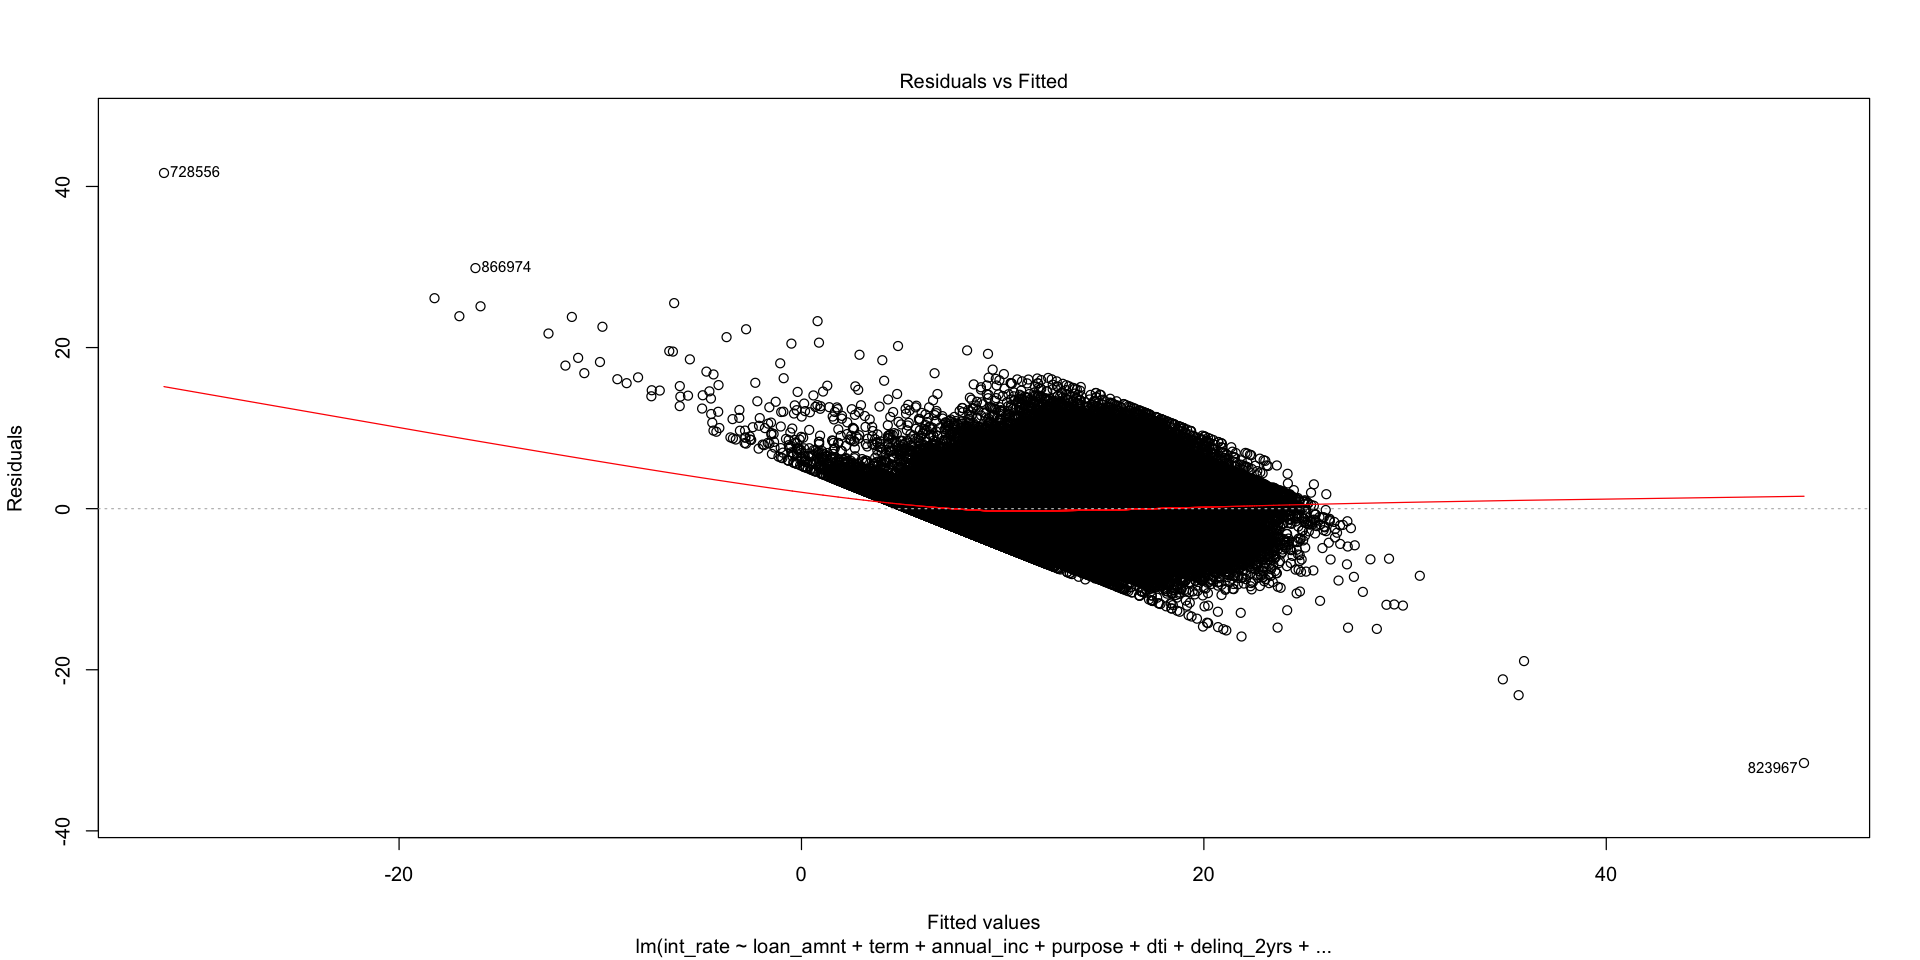

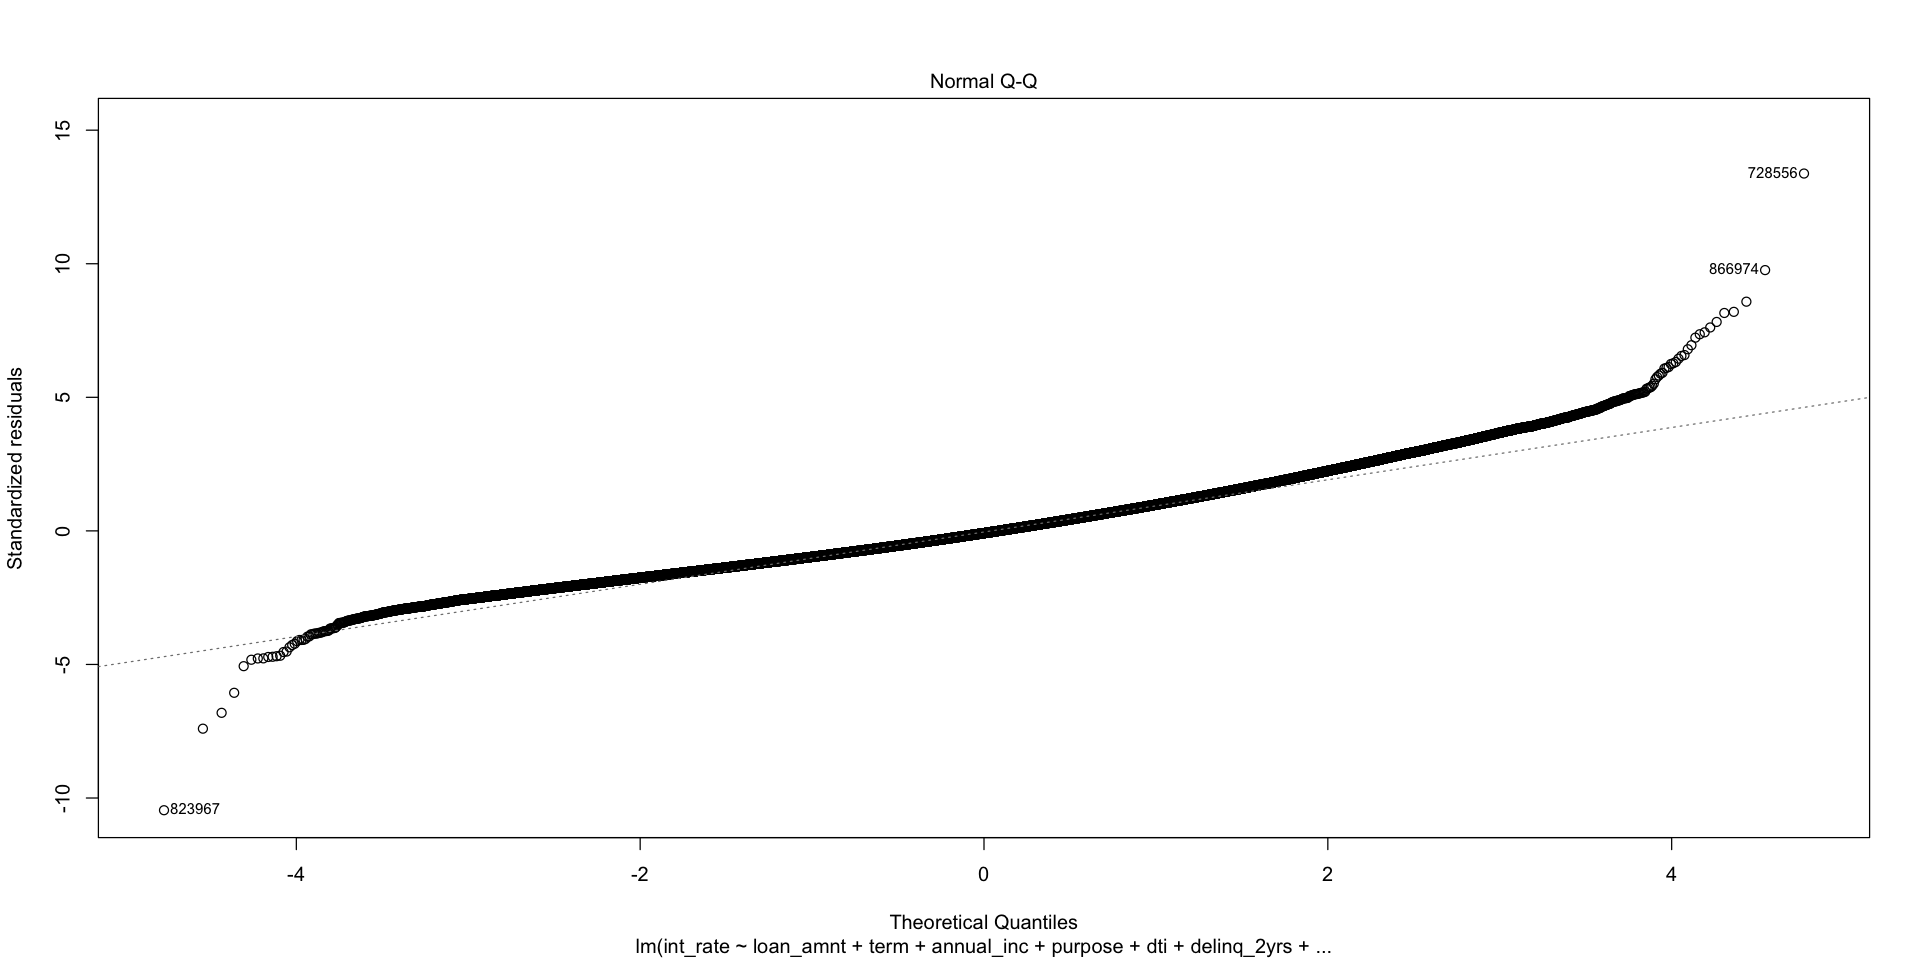

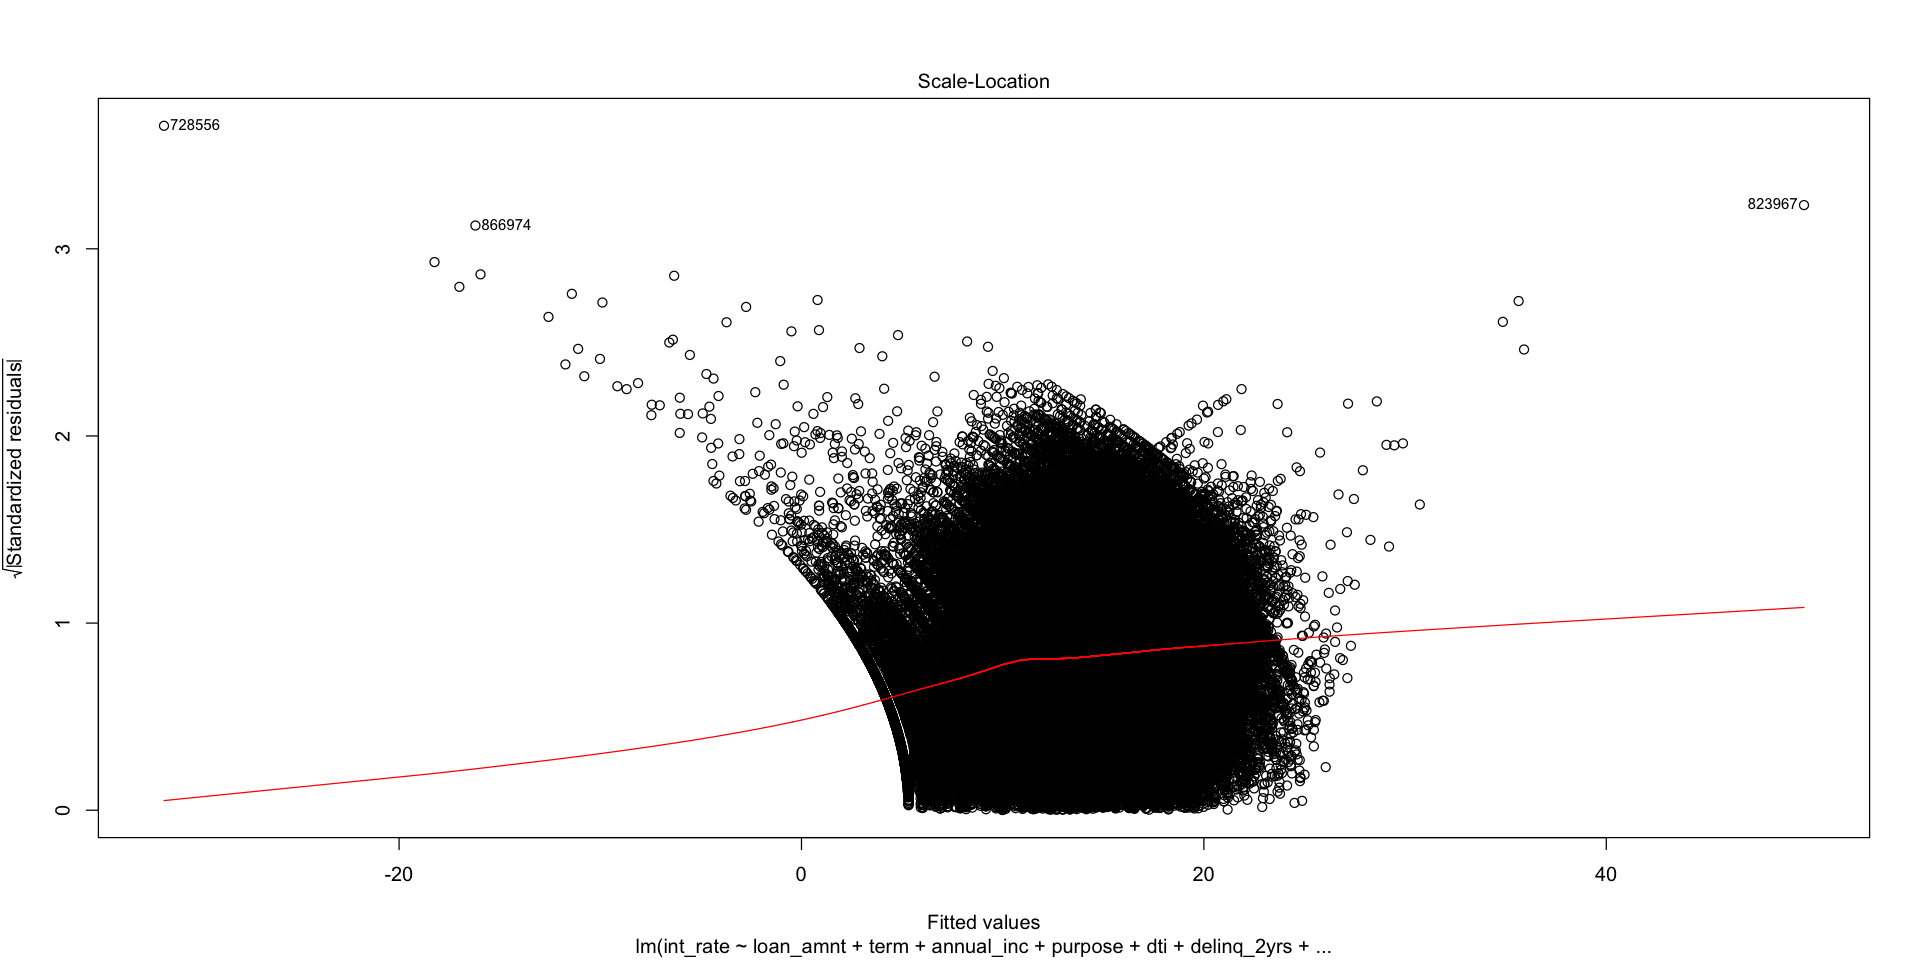

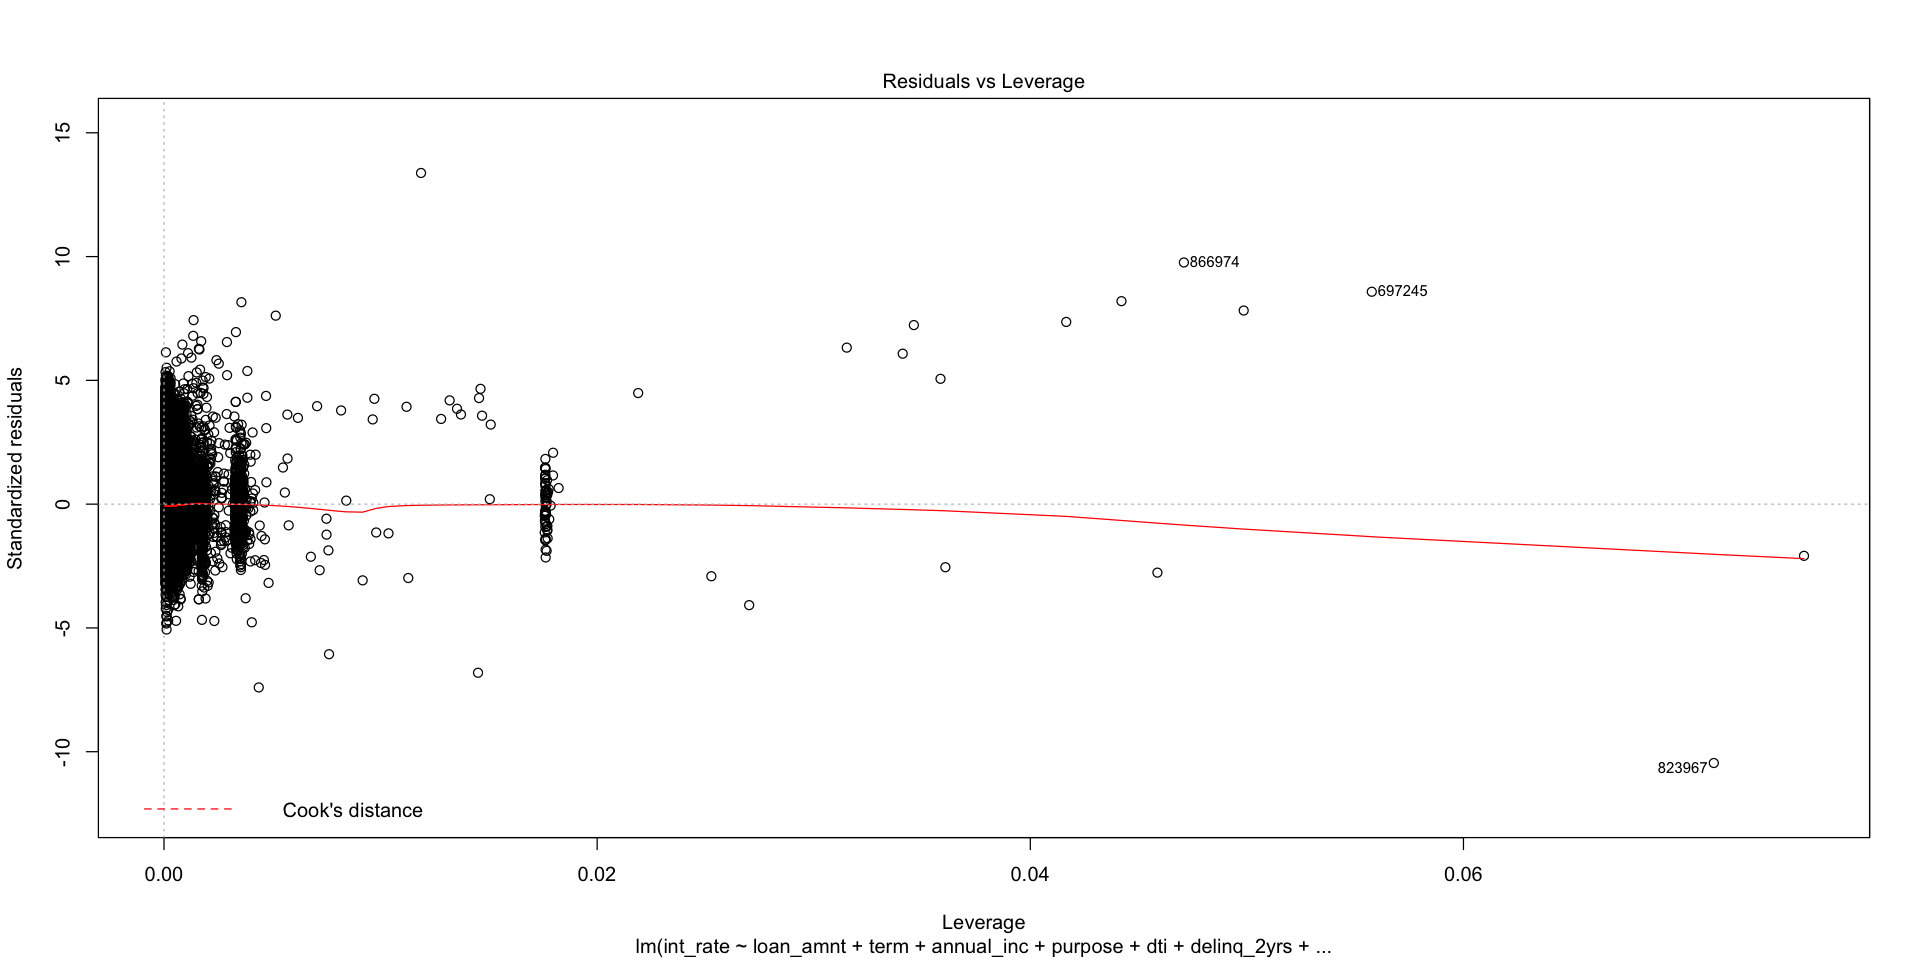

In [62]:
plot(mod2)


Call:
lm(formula = log(int_rate) ~ I(loan_amnt^2) + term + sqrt(annual_inc) + 
    purpose + dti + delinq_2yrs + open_acc + pub_rec + revol_bal + 
    revol_util + total_acc + initial_list_status + last_credit_pull_date + 
    collections_12_mths_ex_med + application_type + acc_now_delinq + 
    tot_coll_amt + tot_cur_bal + total_rev_hi_lim + gen_earliest_cr_line_year + 
    gen_issue_d + gen_issue_year + gen_issue_mon + gen_home_ownership + 
    gen_emp_length_sim + gen_inq_last_6mths, data = train.sub2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7207 -0.1611  0.0063  0.1631  2.3087 

Coefficients: (1 not defined because of singularities)
                                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                    5.467e+00  9.004e-02   60.721  < 2e-16 ***
I(loan_amnt^2)                 1.849e-10  1.329e-12  139.158  < 2e-16 ***
term 60 months                 2.996e-01  7.722e-04  387.991  < 2e-16 ***
sqrt(annual_inc)              -6.806e-04  

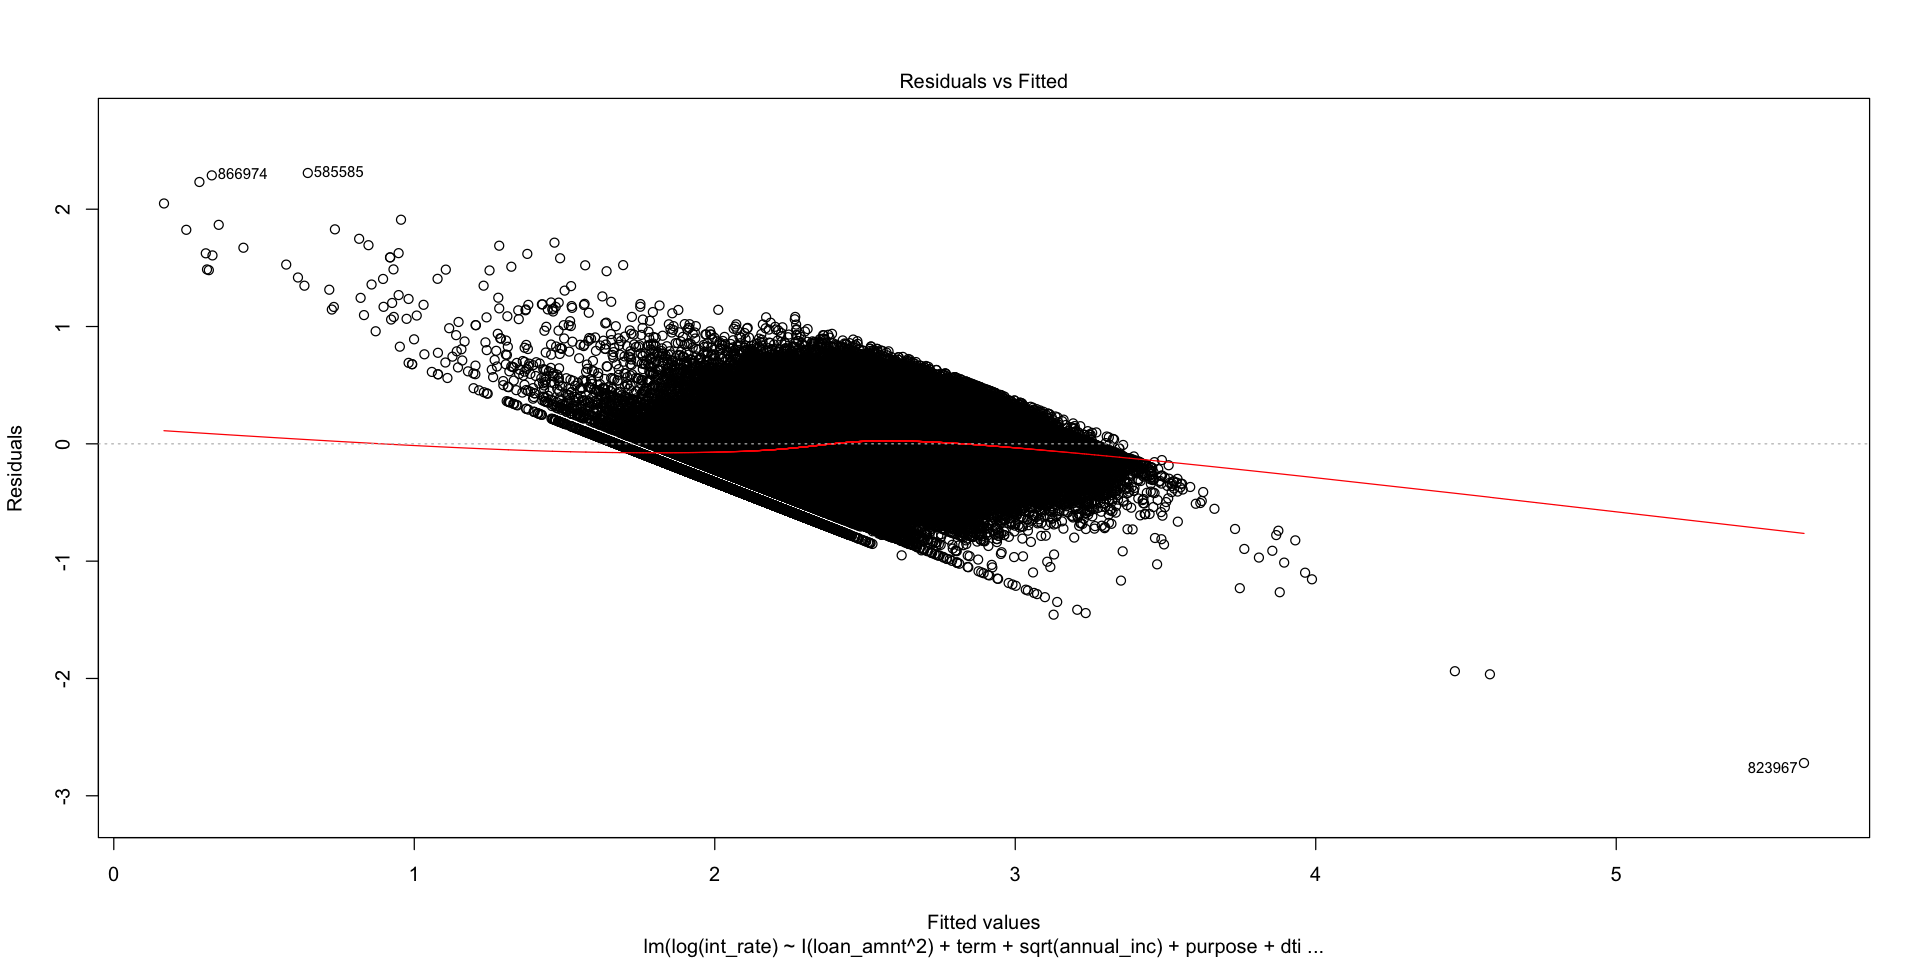

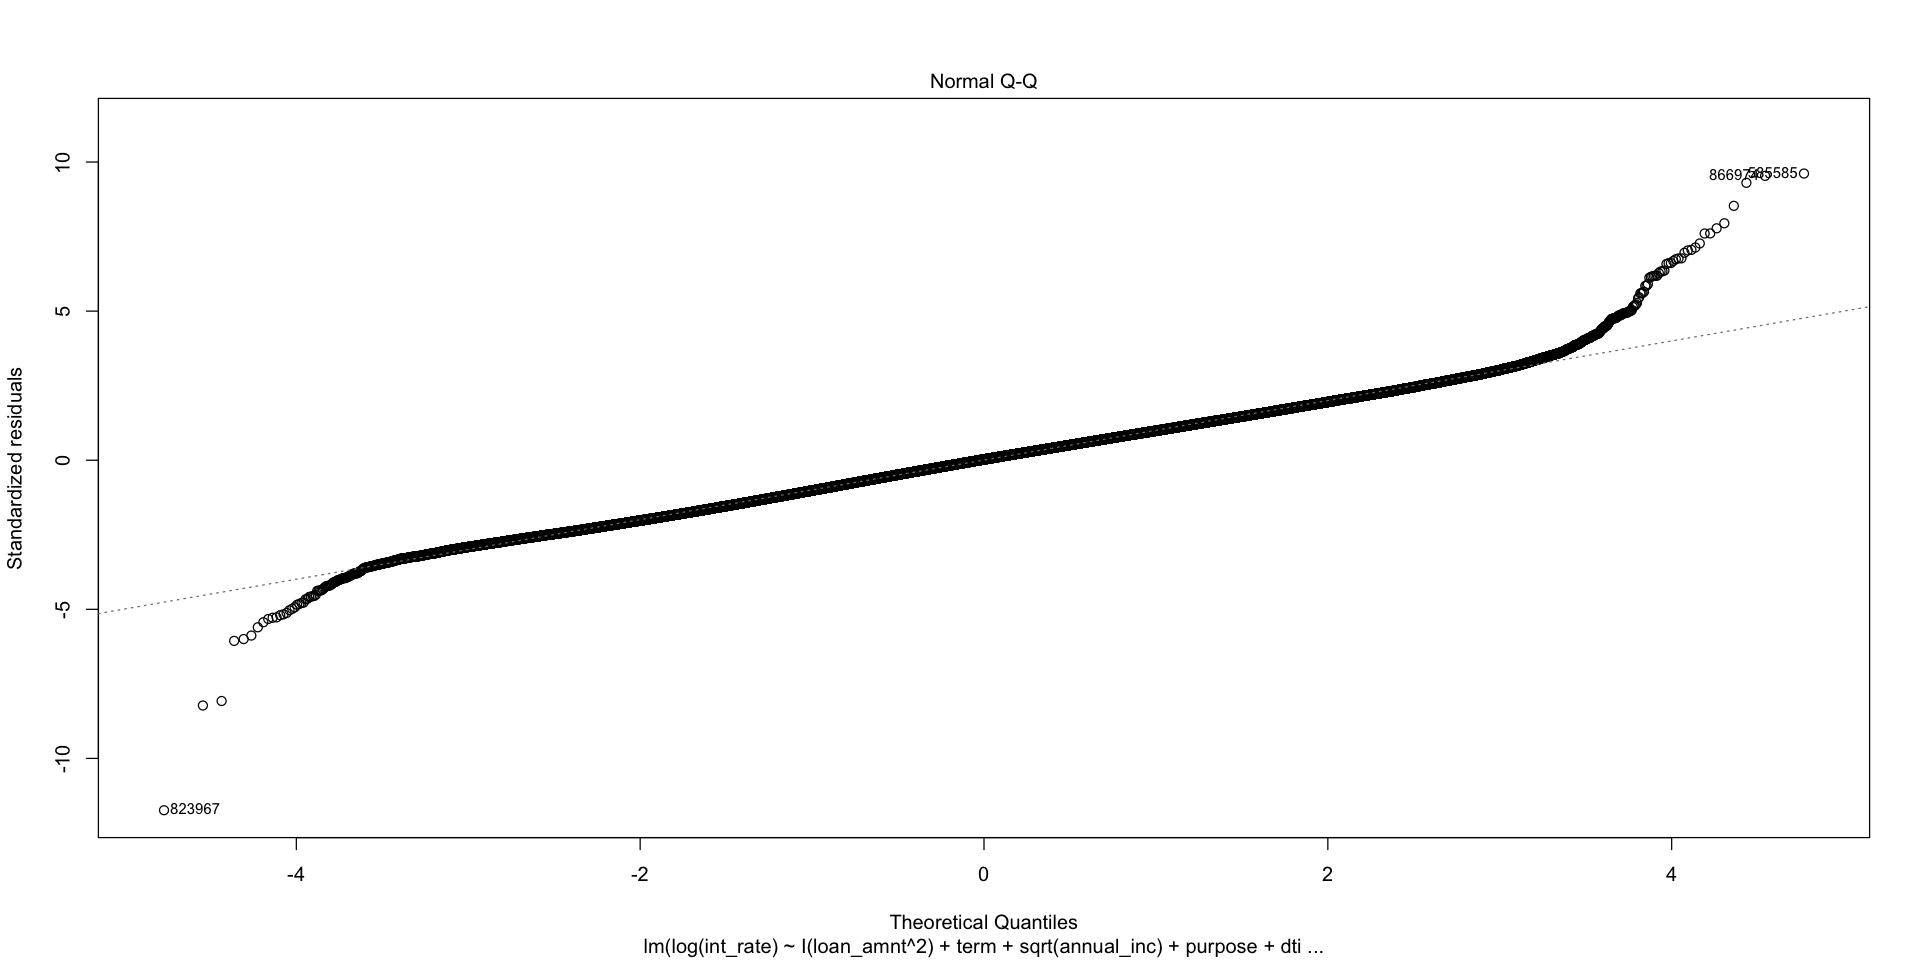

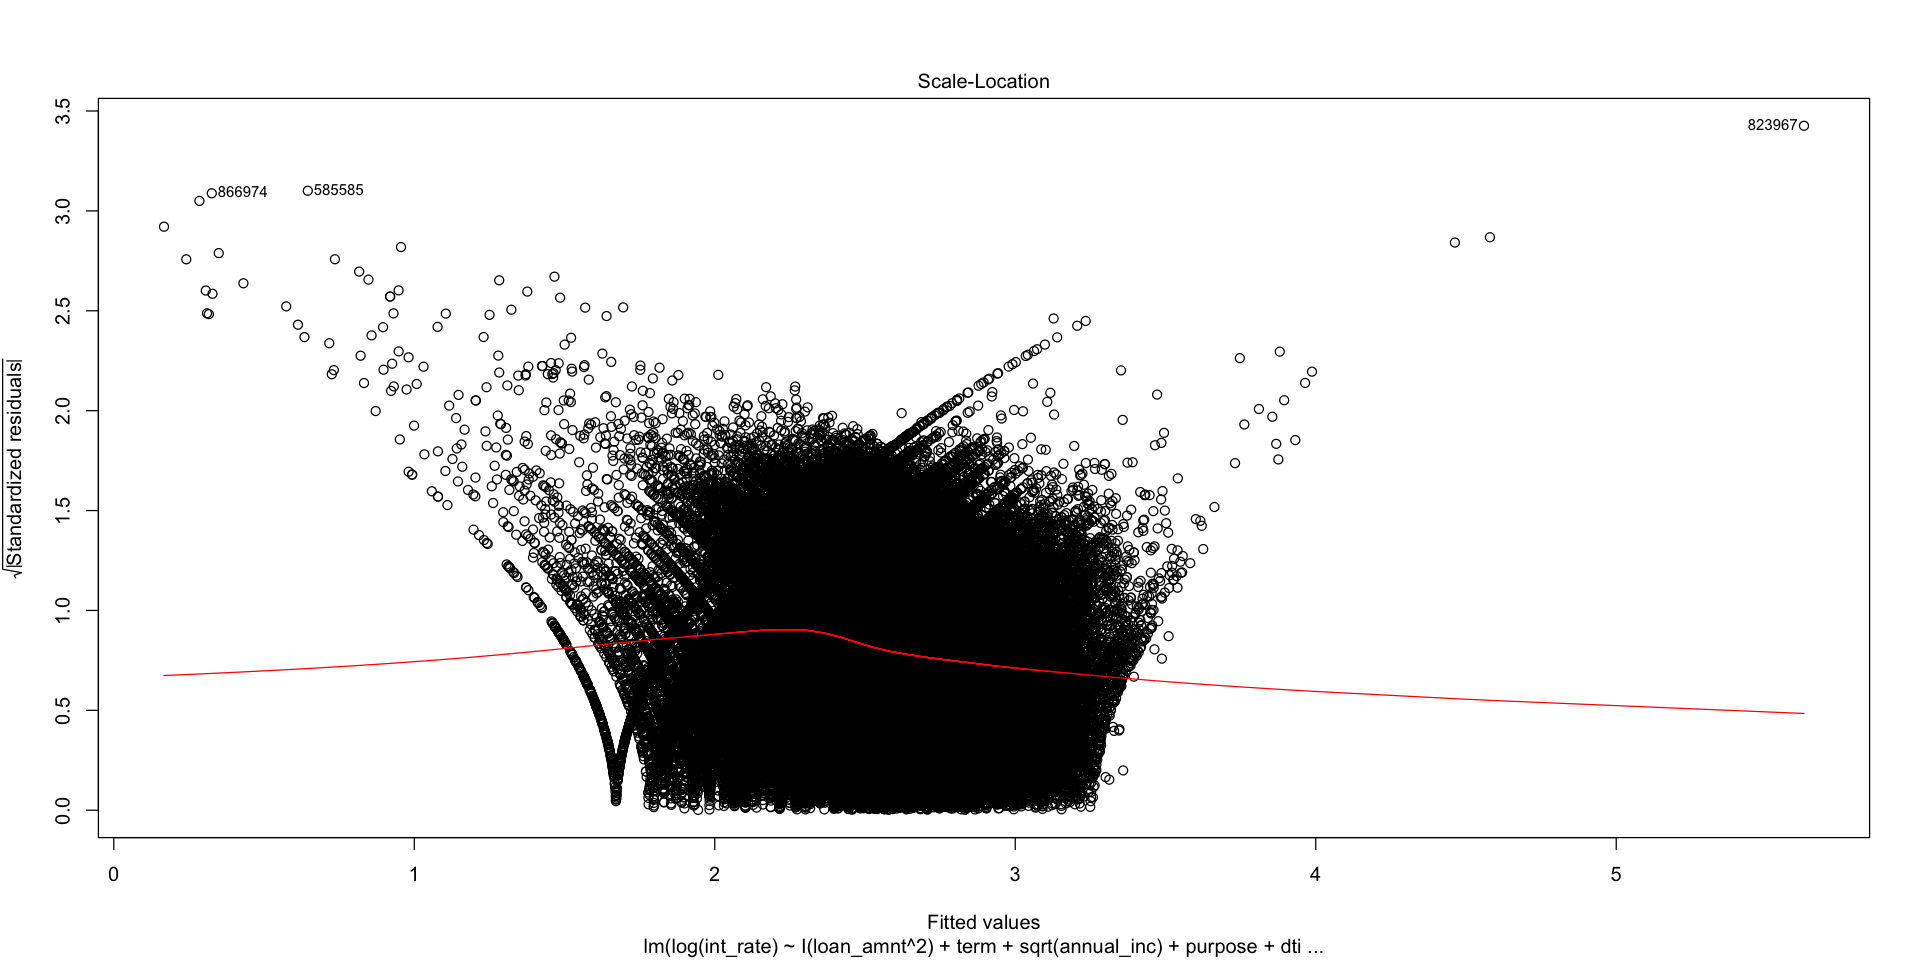

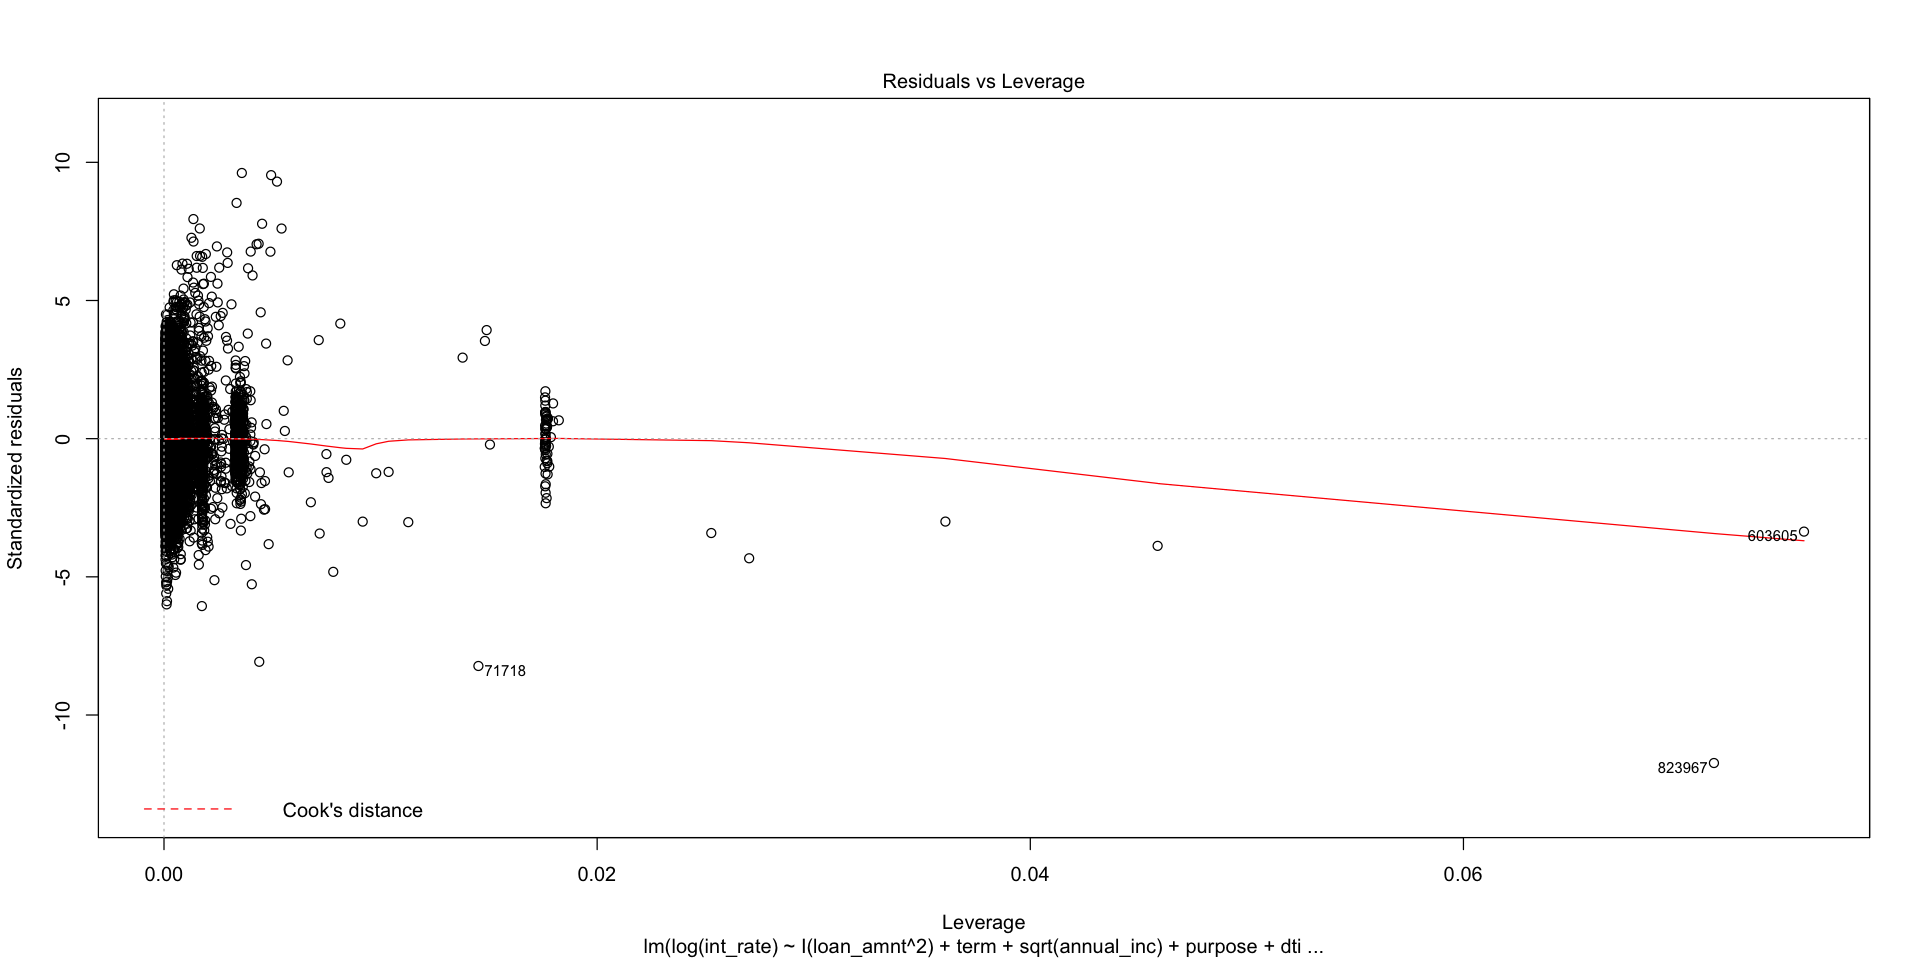

In [63]:
# remove extreme outliers again
# we should not predict negative int_rate, use log
# very large annual_inc do not fit lm, use sqrt
# loan_amnt should be enlarged to fit lm, use ^2
train.sub2 = train.sub[-which(rownames(train.sub) %in% c(728556)), ]
mod3 <- lm(log(int_rate) ~ I(loan_amnt^2) + term + sqrt(annual_inc) + purpose + dti + delinq_2yrs + 
        open_acc + pub_rec + revol_bal + revol_util + total_acc + 
          initial_list_status + last_credit_pull_date +collections_12_mths_ex_med + application_type 
          + acc_now_delinq + tot_coll_amt + tot_cur_bal + total_rev_hi_lim + 
          gen_earliest_cr_line_year+
          gen_issue_d + gen_issue_year + gen_issue_mon+
          gen_home_ownership+ gen_emp_length_sim + gen_inq_last_6mths
          ,data = train.sub2)
summary(mod3)
plot(mod3)

In [64]:
# multicollinearity
library(car)
alias(mod3)

Warning message:
“package ‘car’ was built under R version 3.4.3”

Model :
log(int_rate) ~ I(loan_amnt^2) + term + sqrt(annual_inc) + purpose + 
    dti + delinq_2yrs + open_acc + pub_rec + revol_bal + revol_util + 
    total_acc + initial_list_status + last_credit_pull_date + 
    collections_12_mths_ex_med + application_type + acc_now_delinq + 
    tot_coll_amt + tot_cur_bal + total_rev_hi_lim + gen_earliest_cr_line_year + 
    gen_issue_d + gen_issue_year + gen_issue_mon + gen_home_ownership + 
    gen_emp_length_sim + gen_inq_last_6mths

Complete :
                (Intercept) I(loan_amnt^2) term 60 months sqrt(annual_inc)
gen_issue_mon12 -15341/334           0              0              0      
                purposecredit_card purposedebt_consolidation
gen_issue_mon12          0                  0               
                purposehome_improvement purposehouse purposemajor_purchase
gen_issue_mon12          0                       0            0           
                purposemedical purposemoving purposeother
gen_issue_mon12          0  

In [65]:
##delete with high multicollinearity
mod4 <- lm(log(int_rate) ~ I(loan_amnt^2) + term + sqrt(annual_inc) + purpose + dti + delinq_2yrs + 
        open_acc + pub_rec + revol_bal + revol_util + total_acc + 
          initial_list_status + last_credit_pull_date +collections_12_mths_ex_med + application_type 
          + acc_now_delinq + tot_coll_amt + tot_cur_bal + total_rev_hi_lim + 
          gen_earliest_cr_line_year+
          gen_issue_d +
          gen_home_ownership+ gen_emp_length_sim + gen_inq_last_6mths
          ,data = train.sub2)

In [66]:
library(car)
vif(mod4)

,GVIF,Df,GVIF^(1/(2*Df))
I(loan_amnt^2),1.624256,1,1.274463
term,1.198893,1,1.094940
sqrt(annual_inc),2.080642,1,1.442443
purpose,1.138518,12,1.005420
dti,1.413328,1,1.188835
delinq_2yrs,1.064263,1,1.031631
open_acc,2.324056,1,1.524486
pub_rec,1.072274,1,1.035507
revol_bal,6.323122,1,2.514582
revol_util,1.890520,1,1.374962



Call:
lm(formula = log(int_rate) ~ I(loan_amnt^2) + term + sqrt(annual_inc) + 
    purpose + dti + delinq_2yrs + open_acc + pub_rec + revol_util + 
    total_acc + initial_list_status + last_credit_pull_date + 
    collections_12_mths_ex_med + application_type + acc_now_delinq + 
    tot_coll_amt + tot_cur_bal + total_rev_hi_lim + gen_earliest_cr_line_year + 
    gen_issue_d + gen_home_ownership + gen_emp_length_sim + gen_inq_last_6mths, 
    data = train.sub2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.94271 -0.16389  0.00594  0.16539  2.91315 

Coefficients:
                                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                    5.820e+00  4.871e-02  119.485  < 2e-16 ***
I(loan_amnt^2)                 1.805e-10  1.346e-12  134.092  < 2e-16 ***
term 60 months                 3.012e-01  7.825e-04  384.981  < 2e-16 ***
sqrt(annual_inc)              -6.795e-04  6.365e-06 -106.761  < 2e-16 ***
purposecredit_card            -1.203e-01  3.

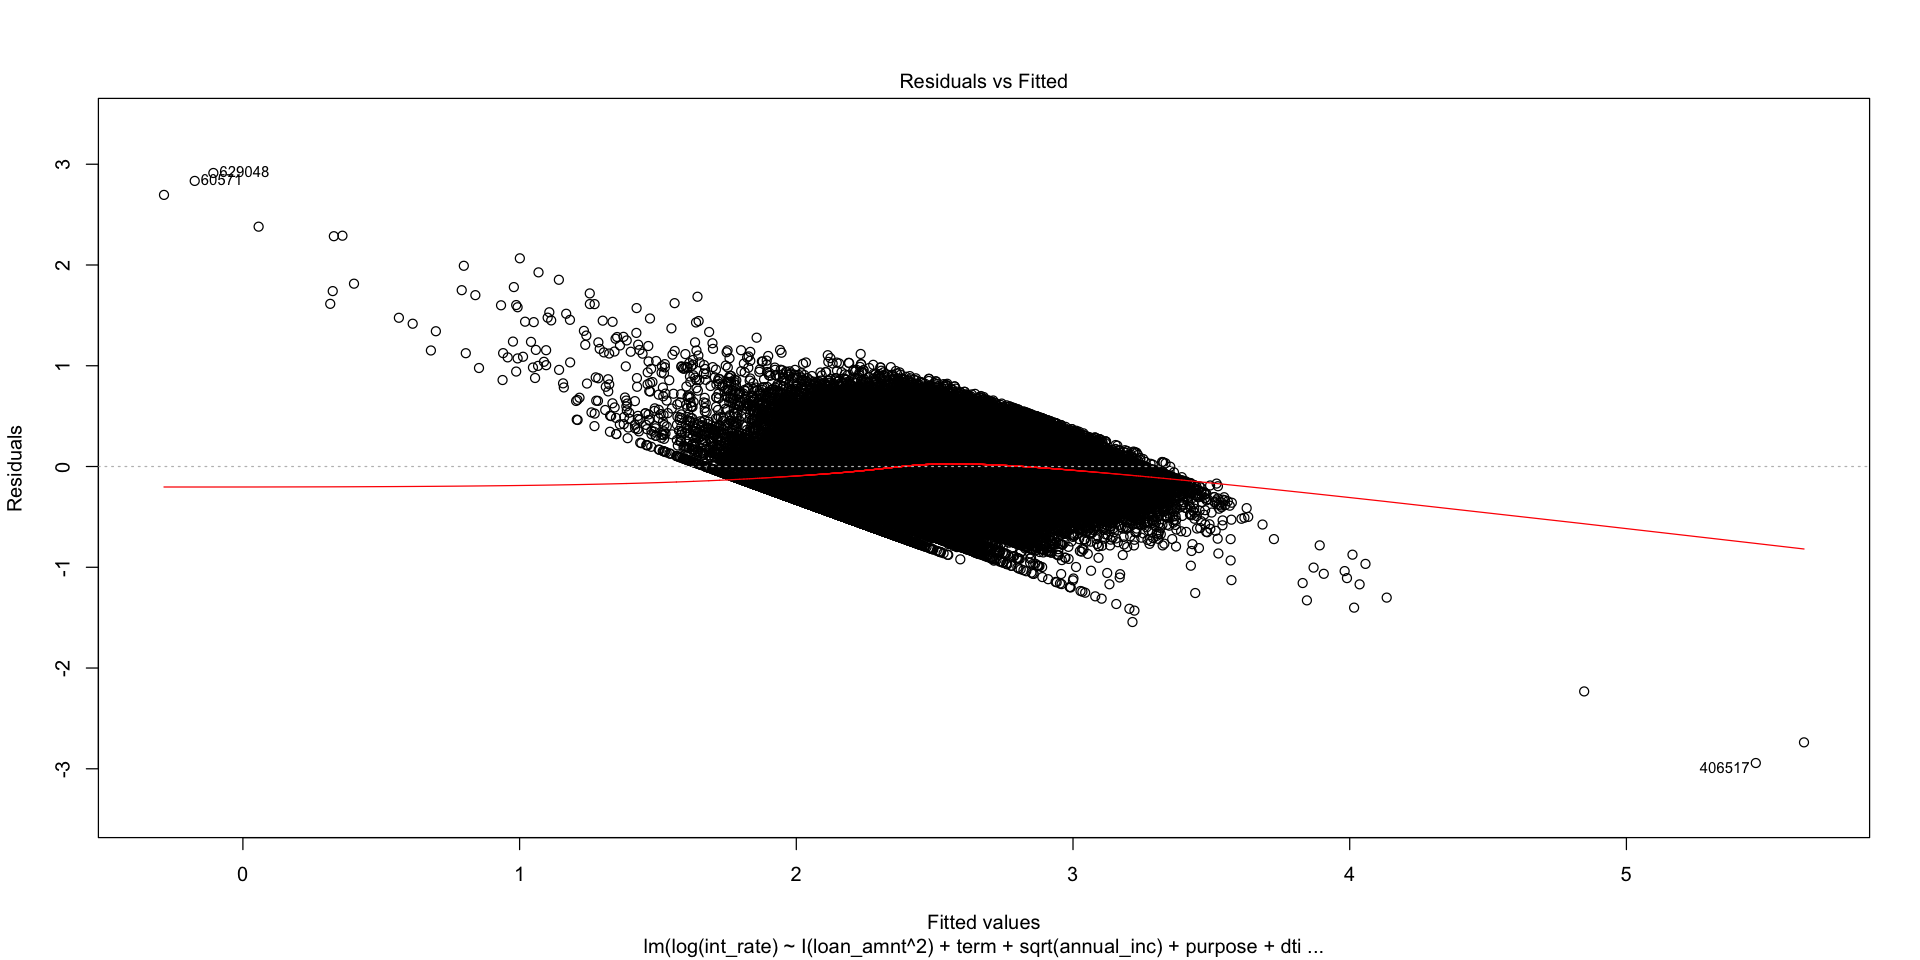

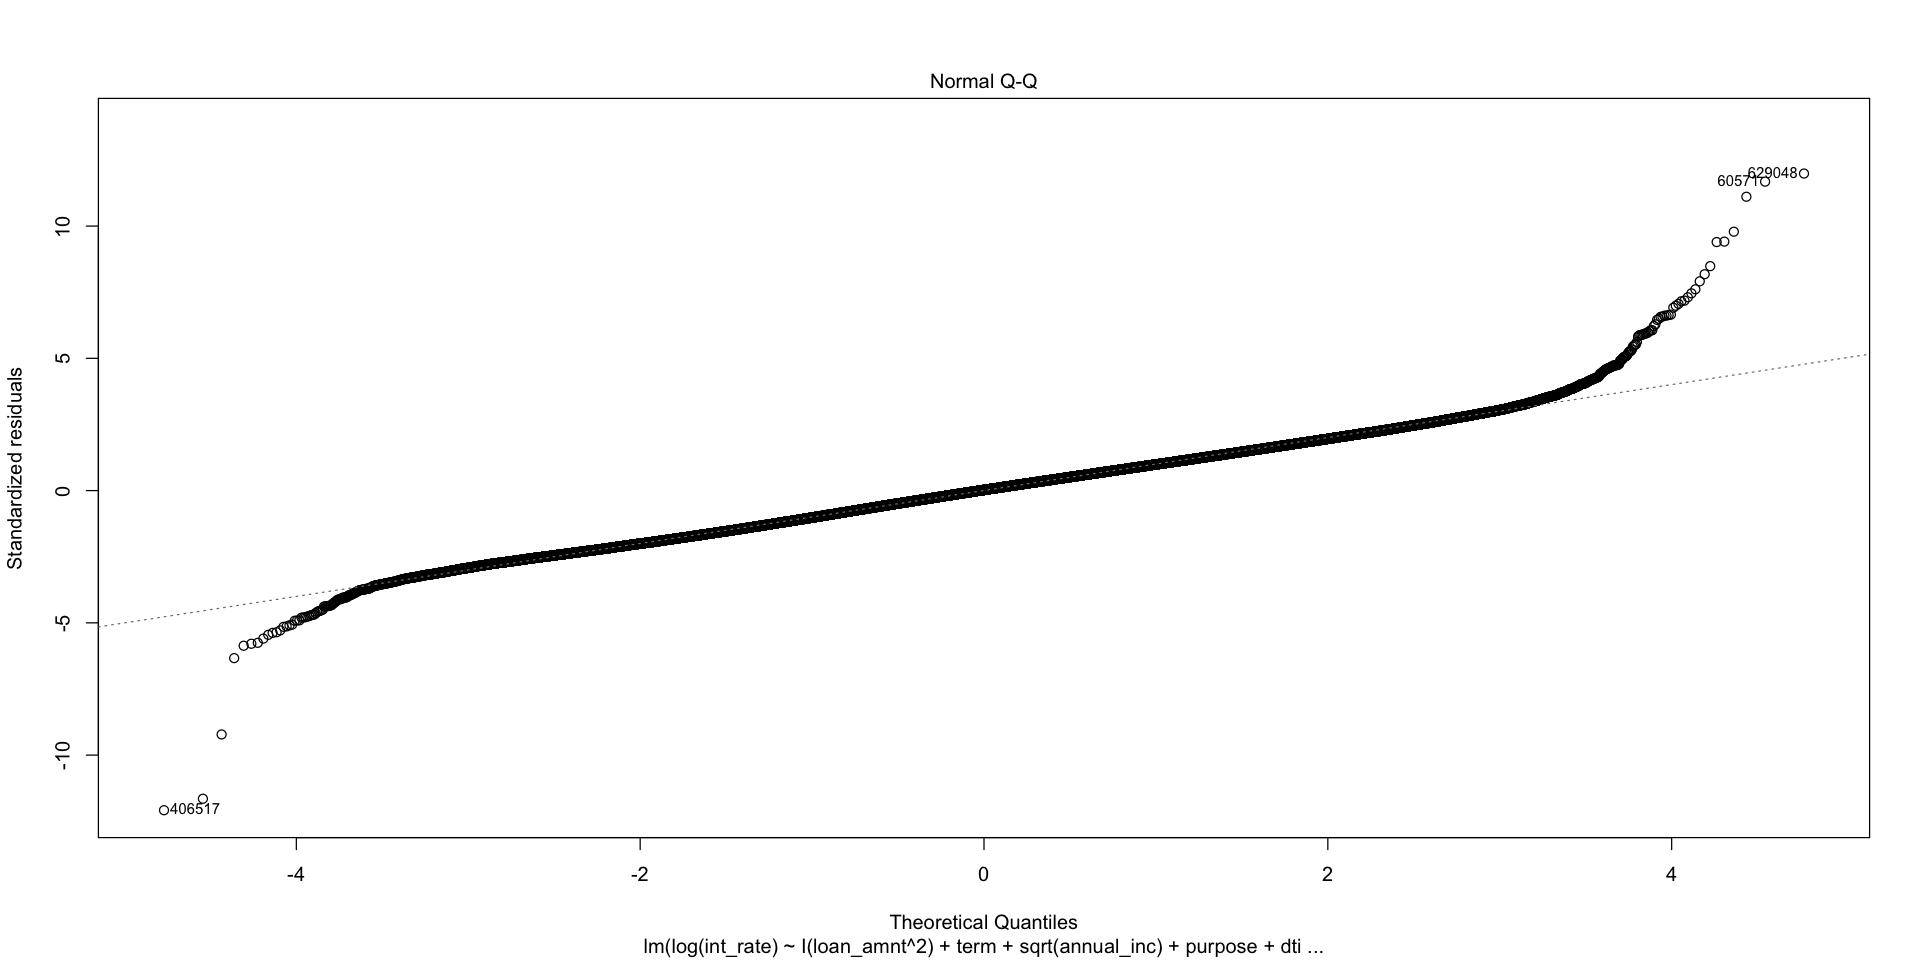

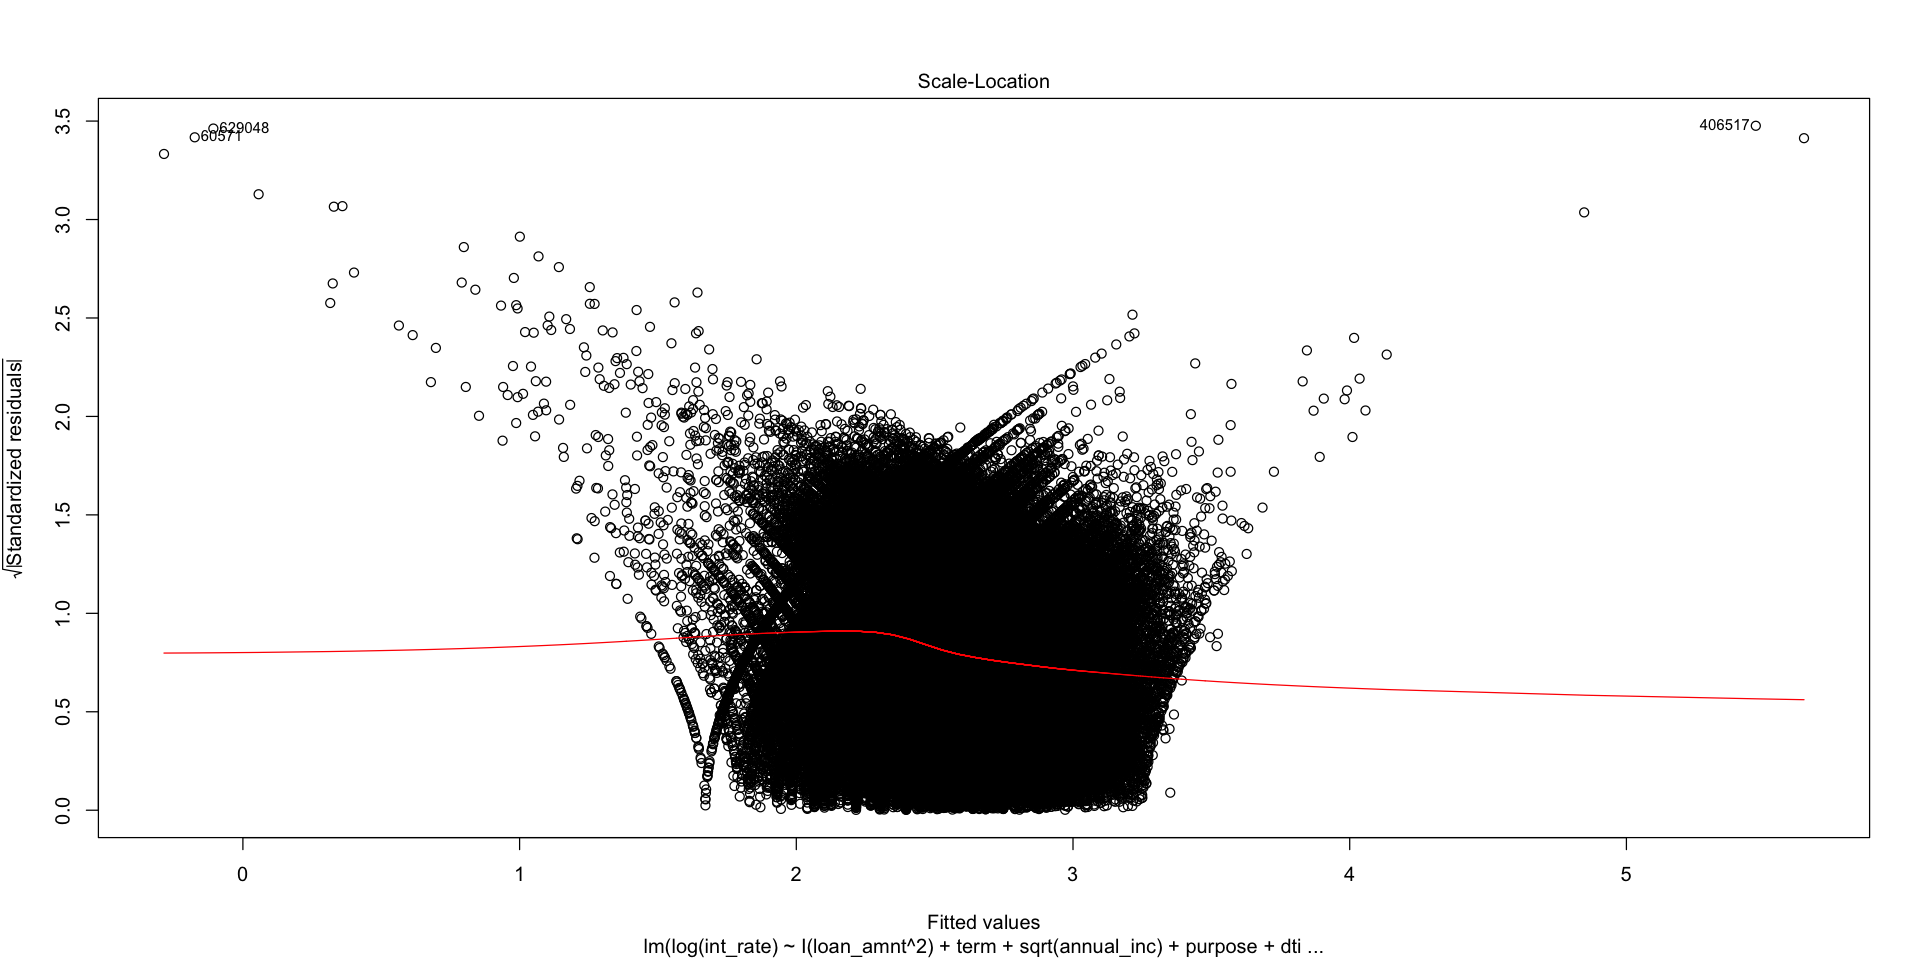

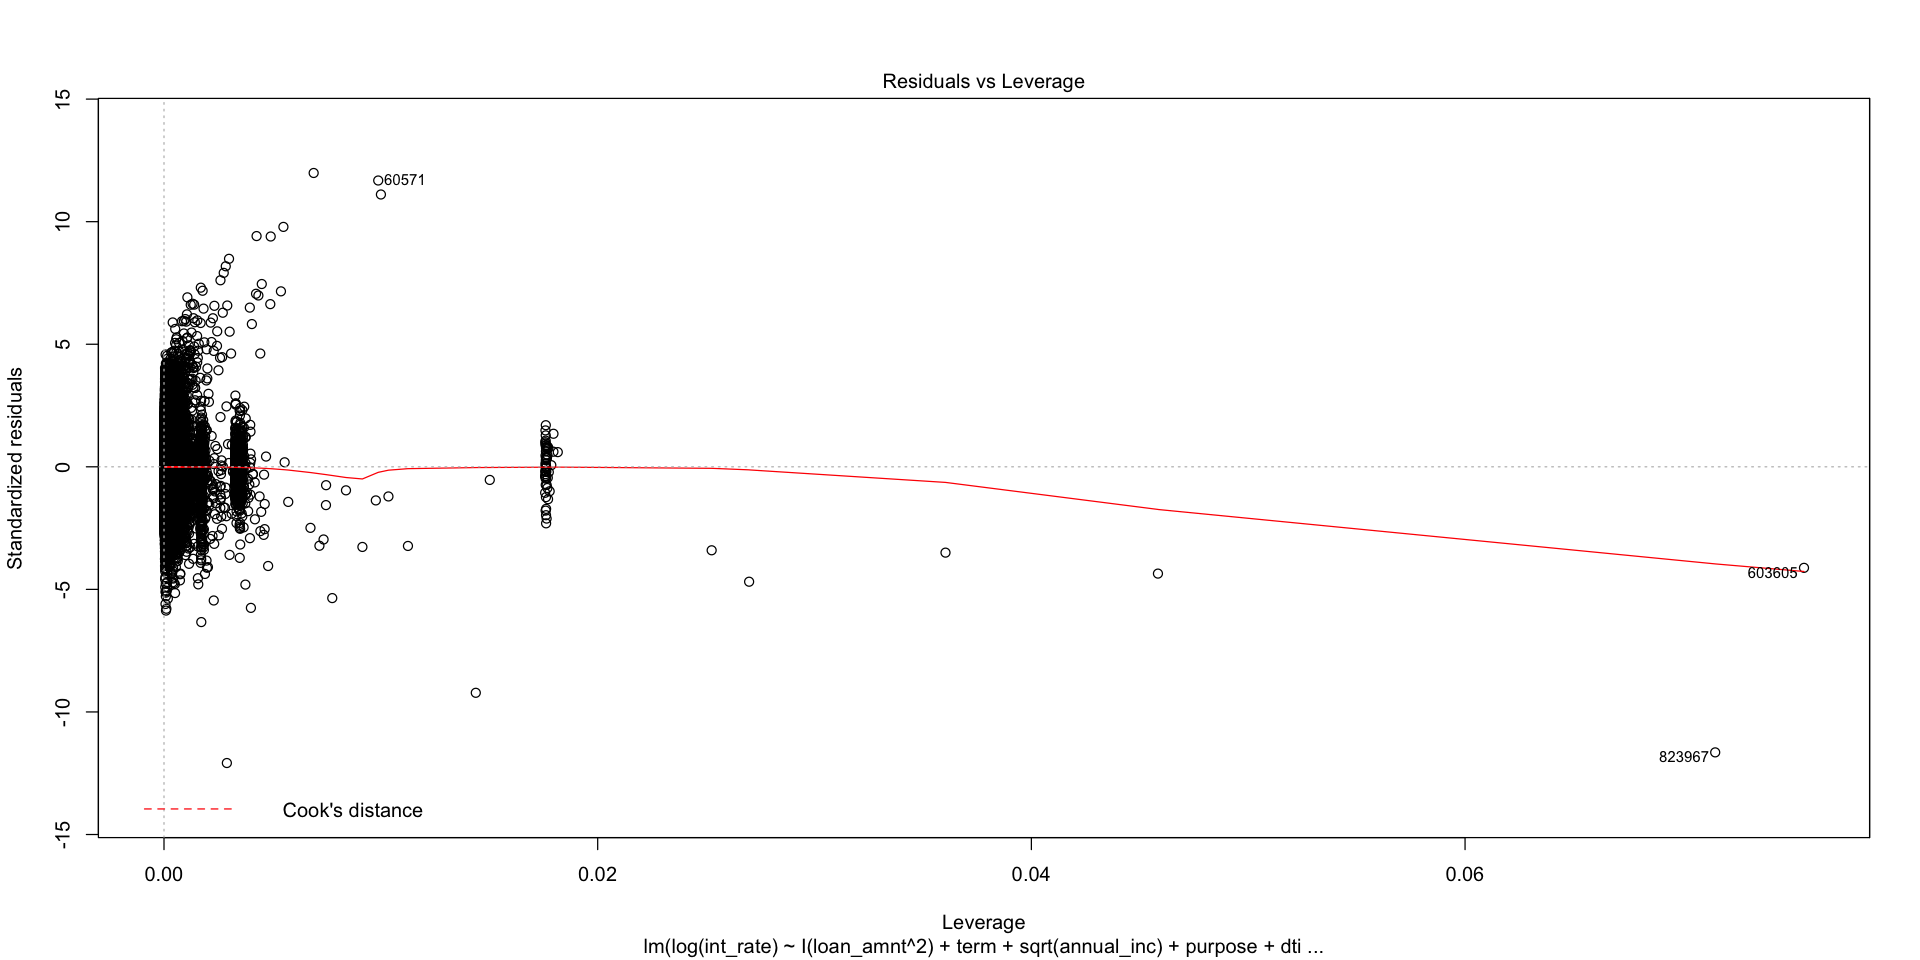

In [67]:
##delete feature with high vif>5
mod5 <- lm(log(int_rate) ~ I(loan_amnt^2) + term + sqrt(annual_inc) + purpose + dti + delinq_2yrs + 
        open_acc + pub_rec + revol_util + total_acc + 
          initial_list_status + last_credit_pull_date +collections_12_mths_ex_med + application_type 
          + acc_now_delinq + tot_coll_amt + tot_cur_bal + total_rev_hi_lim + 
          gen_earliest_cr_line_year+
          gen_issue_d +
          gen_home_ownership+ gen_emp_length_sim + gen_inq_last_6mths
          ,data = train.sub2)
summary(mod5)
plot(mod5)

In [68]:
## check VIF
library(car)
vif(mod5)

,GVIF,Df,GVIF^(1/(2*Df))
I(loan_amnt^2),1.622745,1,1.273870
term,1.198753,1,1.094876
sqrt(annual_inc),2.080467,1,1.442382
purpose,1.137759,12,1.005392
dti,1.403422,1,1.184661
delinq_2yrs,1.062175,1,1.030619
open_acc,2.279513,1,1.509805
pub_rec,1.066229,1,1.032584
revol_util,1.247812,1,1.117055
total_acc,2.375889,1,1.541392


In [69]:
# binning "ANY", "NONE", "OTHER"
loan$gen_home_ownership = loan$home_ownership
loan$gen_home_ownership[loan$home_ownership %in% c("ANY", "NONE", "OTHER")] = "others"

In [70]:
# split data into train and test for model performance
set.seed(1)
loan.complete = loan[complete.cases(loan), ]
train.ind <- sample(1:dim(loan.complete)[1], 0.7 * dim(loan.complete)[1])
train <- loan.complete[train.ind, ]
test <- loan.complete[-train.ind, ]

In [75]:
loan.complete

,loan_amnt,term,int_rate,emp_title,emp_length,home_ownership,annual_inc,issue_d,purpose,title,⋯,gen_earliest_cr_line_year,gen_issue_d,gen_issue_year,gen_issue_mon,gen_home_ownership,gen_emp_length_sim,last_credit_pull_date,gen_inq_last_6mths,gen_loan_amnt_square,gen_annual_inc_sqrt
42536,27050,36 months,10.99,Team Leadern Customer Ops & Systems,10+ years,OWN,55000,Dec-2013,debt_consolidation,Debt Consolidation,⋯,1986,2013-12-01,2013,12,OWN,>= 5,2015-12-01,0,731702500,234.5208
42537,9750,36 months,13.98,Medical Assistant,1 year,RENT,26000,Dec-2013,debt_consolidation,Debt Consilation,⋯,2007,2013-12-01,2013,12,RENT,< 5,2016-01-01,0,95062500,161.2452
42538,12000,36 months,6.62,MANAGER INFORMATION DELIVERY,10+ years,MORTGAGE,105000,Dec-2013,debt_consolidation,UNIVERSAL CARD,⋯,1994,2013-12-01,2013,12,MORTGAGE,>= 5,2016-01-01,1,144000000,324.0370
42539,12000,36 months,13.53,On road manager,10+ years,RENT,40000,Dec-2013,debt_consolidation,Debt consolidation,⋯,1998,2013-12-01,2013,12,RENT,>= 5,2016-01-01,0,144000000,200.0000
42540,15000,36 months,8.90,aircraft maintenance engineer,2 years,MORTGAGE,63000,Dec-2013,debt_consolidation,Pay off,⋯,1998,2013-12-01,2013,12,MORTGAGE,< 5,2016-01-01,0,225000000,250.9980
42541,12000,36 months,11.99,LTC,10+ years,MORTGAGE,130000,Dec-2013,debt_consolidation,Debt consolidation,⋯,1997,2013-12-01,2013,12,MORTGAGE,>= 5,2016-01-01,1,144000000,360.5551
42542,14000,36 months,12.85,Assistant Director - Human Resources,4 years,RENT,88000,Dec-2013,debt_consolidation,Debt consolidation,⋯,1988,2013-12-01,2013,12,RENT,< 5,2016-01-01,0,196000000,296.6479
42543,7550,36 months,16.24,Special Order Fulfillment Clerk,3 years,RENT,28000,Dec-2013,debt_consolidation,Debt consolidation,⋯,2010,2013-12-01,2013,12,RENT,< 5,2016-01-01,0,57002500,167.3320
42544,10000,36 months,9.67,Registered Nurse,7 years,MORTGAGE,102000,Dec-2013,debt_consolidation,Clean Up,⋯,1989,2013-12-01,2013,12,MORTGAGE,>= 5,2016-01-01,0,100000000,319.3744
42545,3000,36 months,12.85,Auditor,10+ years,RENT,25000,Dec-2013,debt_consolidation,debt,⋯,1991,2013-12-01,2013,12,RENT,>= 5,2016-01-01,0,9000000,158.1139


In [76]:
# process data again

# using selected numerical features
selected_features = c("loan_amnt", "annual_inc", "dti", "delinq_2yrs", "open_acc",
                      "pub_rec", "revol_bal", "revol_util", "total_acc", 
                      "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim", "gen_annual_inc_sqrt", 
                       "int_rate", "gen_loan_amnt_square")

# generate nonlinear features
loan.complete$gen_loan_amnt_square = loan.complete$loan_amnt^2
loan.complete$gen_annual_inc_sqrt = sqrt(loan.complete$annual_inc)

In [77]:
# generate dummy variables
dummy.variable = model.matrix(~purpose + term + gen_home_ownership + 
                              collections_12_mths_ex_med + 
                              acc_now_delinq + gen_emp_length_sim - 1, loan.complete)

In [78]:
# numerical variable
num.variable = as.matrix(loan.complete[, selected_features])

In [79]:
# combine dummy with loan data
loan.sim = cbind(num.variable, dummy.variable)

In [80]:
# split train test
train <- loan.sim[train.ind, ]
test <- loan.sim[-train.ind, ]

### using elasticnet to generate linear model

In [81]:
library(glmnet)

In [82]:
which(colnames(train) == "int_rate")

[1] 14

In [83]:
train.feature = train[, -14]
train.label = train[, 14]
test.feature = test[, -14]
test.label = test[, 14]

save(train.feature, file = "train_feature.Rdata")
save(train.label, file = "train_label.Rdata")
save(test.feature, file = "test_feature.Rdata")
save(test.label, file = "test_label.Rdata")

In [84]:
colnames(train.feature)

[1] "loan_amnt"                  "annual_inc"                
 [3] "dti"                        "delinq_2yrs"               
 [5] "open_acc"                   "pub_rec"                   
 [7] "revol_bal"                  "revol_util"                
 [9] "total_acc"                  "tot_coll_amt"              
[11] "tot_cur_bal"                "total_rev_hi_lim"          
[13] "gen_annual_inc_sqrt"        "gen_loan_amnt_square"      
[15] "purposecar"                 "purposecredit_card"        
[17] "purposedebt_consolidation"  "purposeeducational"        
[19] "purposehome_improvement"    "purposehouse"              
[21] "purposemajor_purchase"      "purposemedical"            
[23] "purposemoving"              "purposeother"              
[25] "purposerenewable_energy"    "purposesmall_business"     
[27] "purposevacation"            "purposewedding"            
[29] "term 60 months"             "gen_home_ownershipothers"  
[31] "gen_home_ownershipOWN"      "gen_home_ownershipRENT"    
[33] "collections_12_mths_ex_med" "acc_now_delinq"            
[35] "gen_emp_length_sim>= 5"

In [85]:
mod.glmnet <- glmnet(x=train.feature, y=train.label)

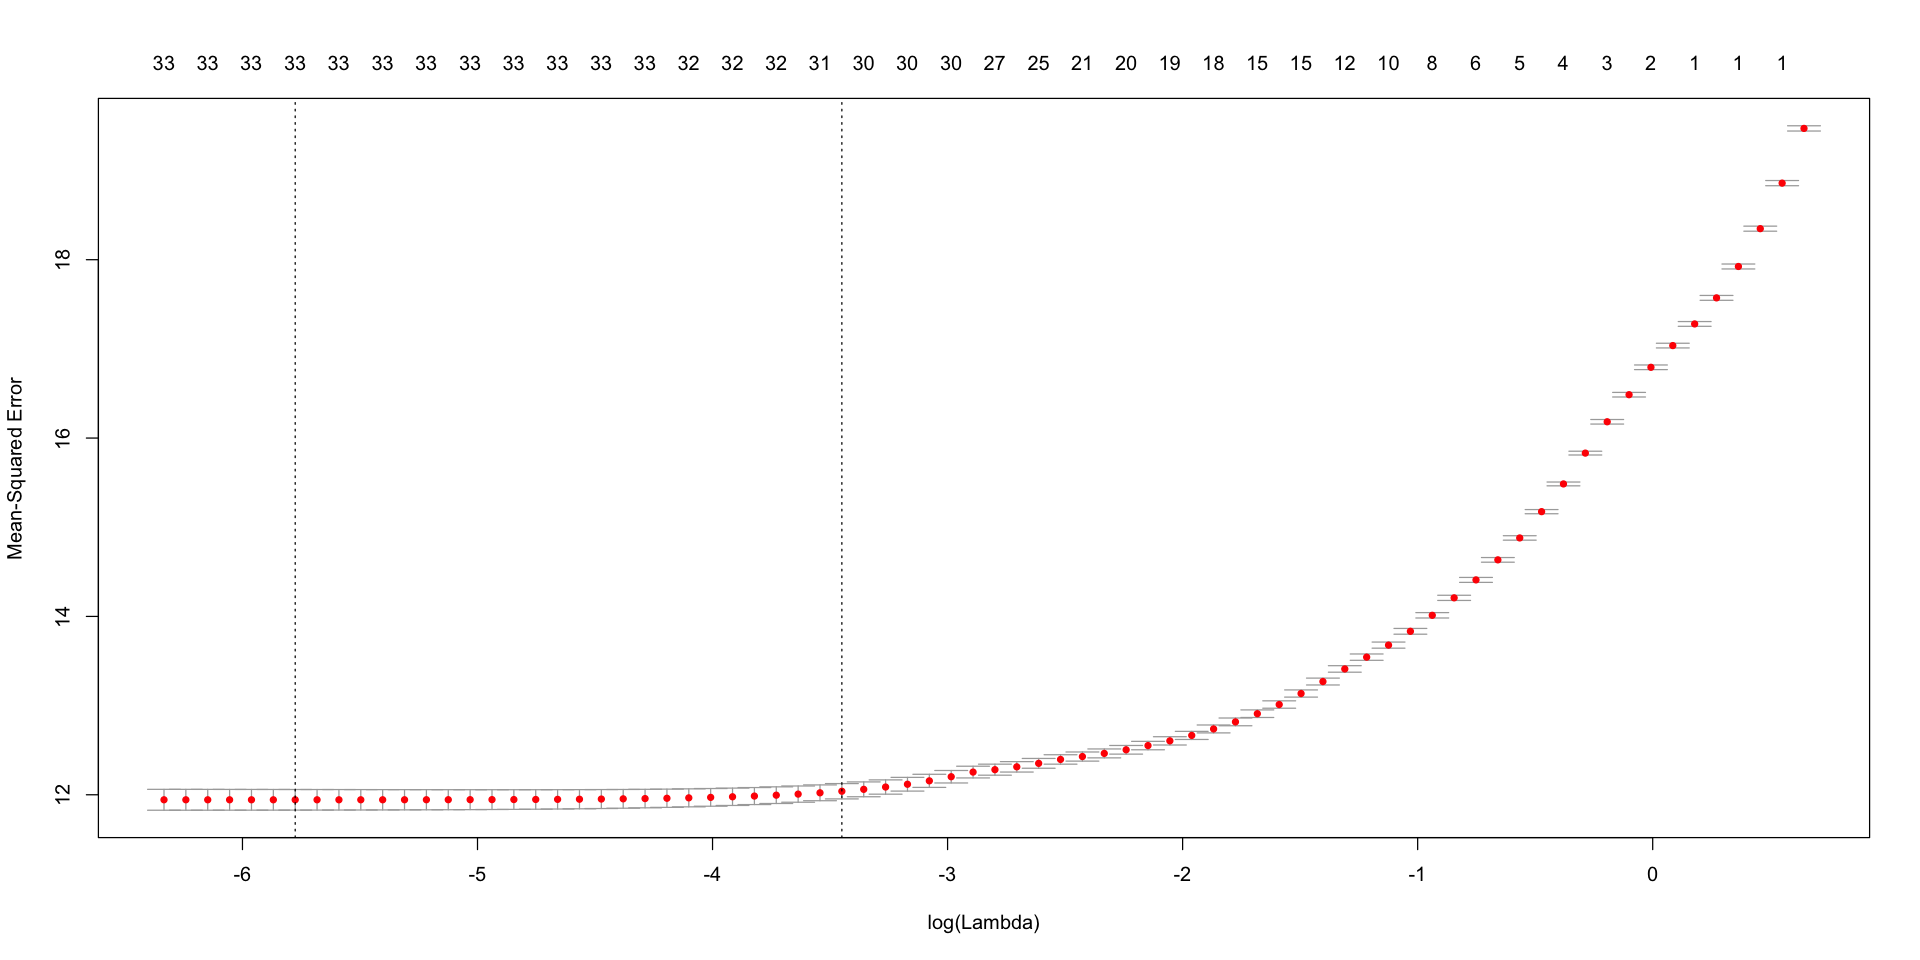

In [86]:
cvfit <- cv.glmnet(train.feature, train.label)
plot(cvfit)

In [87]:
# predict result with minimum mean cross-validated error
glm.pred = predict(cvfit, newx = test.feature, s = "lambda.min")

In [90]:
cvfit

$lambda
 [1] 1.903524931 1.734421022 1.580339839 1.439946803 1.312025898 1.195469133
 [7] 1.089266950 0.992499476 0.904328558 0.823990502 0.750789457 0.684091390
[13] 0.623318597 0.567944691 0.517490050 0.471517660 0.429629331 0.391462245
[19] 0.356685818 0.324998833 0.296126832 0.269819741 0.245849699 0.224009089
[25] 0.204108739 0.185976281 0.169454661 0.154400776 0.140684236 0.128186237
[31] 0.116798525 0.106422466 0.096968187 0.088353801 0.080504692 0.073352877
[37] 0.066836410 0.060898848 0.055488762 0.050559293 0.046067745 0.041975213
[43] 0.038246251 0.034848560 0.031752710 0.028931886 0.026361657 0.024019760
[49] 0.021885911 0.019941627 0.018170068 0.016555889 0.015085110 0.013744990
[55] 0.012523923 0.011411332 0.010397581 0.009473888 0.008632254 0.007865389
[61] 0.007166649 0.006529984 0.005949878 0.005421307 0.004939693 0.004500865
[67] 0.004101020 0.003736697 0.003404739 0.003102271 0.002826674 0.002575560
[73] 0.002346755 0.002138275 0.001948317 0.001775234

$cvm
 [1] 19.4

In [88]:
# cross validation result : root mean square error

mean((glm.pred - test.label)^2)^0.5

[1] 3.482633

### nonlinear model random forest

In [93]:
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



In [94]:
# convert categorical data to factor
loan.complete$purpose = as.factor(loan.complete$purpose)
loan.complete$term = as.factor(loan.complete$term)
loan.complete$gen_home_ownership = as.factor(loan.complete$gen_home_ownership)
loan.complete$collections_12_mths_ex_med = as.factor(loan.complete$collections_12_mths_ex_med)
loan.complete$acc_now_delinq = as.factor(loan.complete$acc_now_delinq)
loan.complete$gen_emp_length_sim = as.factor(loan.complete$gen_emp_length_sim)

In [97]:
# using selected numerical features
selected_features = c("loan_amnt", "annual_inc", "dti", "delinq_2yrs", "open_acc", "purpose", "term",
                      "pub_rec", "revol_bal", "revol_util", "total_acc", "purpose", "term", "gen_home_ownership",
                      "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim", "gen_annual_inc_sqrt", "collections_12_mths_ex_med",
                       "int_rate", "gen_loan_amnt_square", "acc_now_delinq", "gen_emp_length_sim",
                      "gen_home_ownership", "collections_12_mths_ex_med", "acc_now_delinq", "gen_emp_length_sim")

In [98]:
# random forest can handle categorical data
train.rf <- loan.complete[train.ind, selected_features]
test.rf <- loan.complete[-train.ind, selected_features]

save(train.rf, file = "train_rf.Rdata")
save(test.rf, file = "test_rf.Rdata")

In [99]:
which(colnames(train.rf) == "int_rate")

[1] 20

In [100]:
rf <- randomForest(x = train.rf[, -20],
                   y = train.rf[, 20], 
                   xtest = test.rf[, -20],
                   ytest = test.rf[, 20],
                   do.trace = T,
                   nodesize = 5000, ntree = 50)

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
   1 |    12.62    64.79 |    12.55    64.47 |
   2 |    12.46    63.97 |    12.11    62.20 |
   3 |    12.33    63.32 |    11.96    61.45 |
   4 |    12.24    62.85 |    11.87    60.98 |
   5 |     12.2    62.63 |    11.83    60.79 |
   6 |    12.13    62.29 |     11.8    60.64 |
   7 |    12.08    62.01 |    11.78    60.52 |
   8 |    12.04    61.82 |    11.78    60.49 |
   9 |    12.01    61.67 |    11.77    60.48 |
  10 |    11.99    61.56 |    11.77    60.48 |
  11 |    11.96    61.43 |    11.76    60.42 |
  12 |    11.94    61.33 |    11.76    60.39 |
  13 |    11.92    61.22 |    11.75    60.36 |
  14 |    11.91    61.17 |    11.75    60.36 |
  15 |     11.9    61.12 |    11.75    60.35 |
  16 |    11.89    61.07 |    11.75    60.35 |
  17 |    11.88    61.02 |    11.75    60.33 |
  18 |    11.88    60.99 |    11.75    60.33 |
  19 |    11.87    60.96 |    11.74    60.33 |
  20 |    11.

In [ ]:
# # combine 2 forest

rf1 <- randomForest(x = train.rf[, -20], y = train.rf[, 20], ntree=50)
rf2 <- randomForest(x = train.rf[, -20], y = train.rf[, 20], ntree=50)
rf.comb <- combine(rf1, rf2)

# random forest prediction
rf.pred = predict(rf, test.rf[, -20])

# test rmse
mean((rf.pred - test[,20])^2)^0.5

In [ ]:
save(loan.complete, file = "loan_complete.Rdata")